In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
from inspect import signature
from datetime import datetime
import warnings
warnings.filterwarnings(action = 'ignore')
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

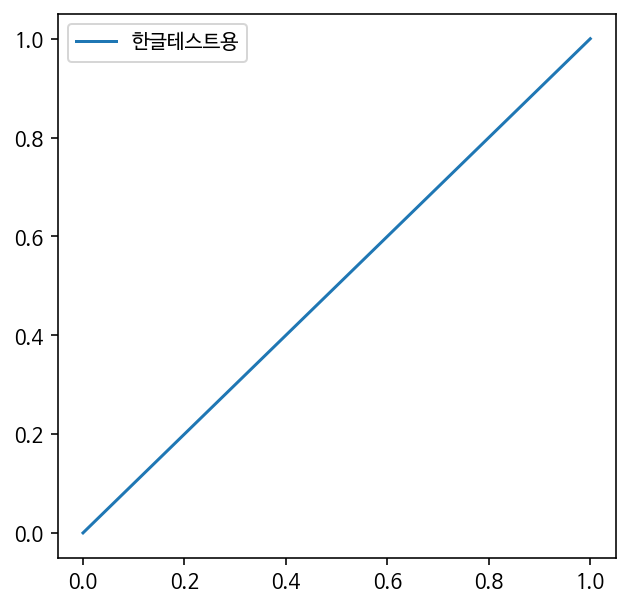

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

### Data파악

In [3]:
df_jeju=pd.read_csv('./df_jeju.csv')

In [4]:
df_jeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,1454855,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,1454856,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,1454857,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,1454858,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,1454859,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497498,24597421,202003,제주,제주시,휴양콘도 운영업,서울,노원구,50s,1,4,3,79500,3
497499,24597422,202003,제주,제주시,휴양콘도 운영업,제주,제주시,30s,1,2,4,1656000,5
497500,24597423,202003,제주,제주시,휴양콘도 운영업,제주,제주시,40s,1,3,3,304560,3
497501,24597424,202003,제주,제주시,휴양콘도 운영업,제주,제주시,50s,2,4,4,60000,4


In [5]:
df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497503 entries, 0 to 497502
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    497503 non-null  int64 
 1   REG_YYMM      497503 non-null  int64 
 2   CARD_SIDO_NM  497503 non-null  object
 3   CARD_CCG_NM   497503 non-null  object
 4   STD_CLSS_NM   497503 non-null  object
 5   HOM_SIDO_NM   497503 non-null  object
 6   HOM_CCG_NM    494432 non-null  object
 7   AGE           497503 non-null  object
 8   SEX_CTGO_CD   497503 non-null  int64 
 9   FLC           497503 non-null  int64 
 10  CSTMR_CNT     497503 non-null  int64 
 11  AMT           497503 non-null  int64 
 12  CNT           497503 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 49.3+ MB


In [6]:
df_jeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,1454855,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,1454856,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,1454857,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,1454858,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,1454859,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497498,24597421,202003,제주,제주시,휴양콘도 운영업,서울,노원구,50s,1,4,3,79500,3
497499,24597422,202003,제주,제주시,휴양콘도 운영업,제주,제주시,30s,1,2,4,1656000,5
497500,24597423,202003,제주,제주시,휴양콘도 운영업,제주,제주시,40s,1,3,3,304560,3
497501,24597424,202003,제주,제주시,휴양콘도 운영업,제주,제주시,50s,2,4,4,60000,4


In [7]:
df_jeju_hun=df_jeju.groupby('REG_YYMM')['AMT'].sum()
# df_jejutransportation_nojeju_per=df_jejutransportation_nojeju['AMT']/df_jejutransportation_nojeju['CNT']
# #건당 지불금액 시리즈를 데이터프레임에 추가
# df_jejutransportation_jeju['AMTper']= df_jejutransportation_jeju_per
# df_jejutransportation_nojeju['AMTper']= df_jejutransportation_nojeju_per

In [8]:
df_jeju_hun

REG_YYMM
201901     91789319740
201902     82004797730
201903     89420874275
201904     90108511963
201905     97084802656
201906     92624250758
201907     95549689709
201908    103389371548
201909     88220834270
201910     94126410878
201911     90968159937
201912     94185684769
202001     93467525597
202002     69580895083
202003     71061095855
Name: AMT, dtype: int64

In [9]:
df_jeju['REG_YYMM'] = pd.to_datetime(df_jeju['REG_YYMM'], format='%Y%m')

In [10]:
df_jeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,1454855,2019-01-01,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,1454856,2019-01-01,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,1454857,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,1454858,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,1454859,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497498,24597421,2020-03-01,제주,제주시,휴양콘도 운영업,서울,노원구,50s,1,4,3,79500,3
497499,24597422,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,30s,1,2,4,1656000,5
497500,24597423,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,40s,1,3,3,304560,3
497501,24597424,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,50s,2,4,4,60000,4


In [11]:
df_alltime=df_jeju.groupby('REG_YYMM')['AMT'].sum()
df_alltime

REG_YYMM
2019-01-01     91789319740
2019-02-01     82004797730
2019-03-01     89420874275
2019-04-01     90108511963
2019-05-01     97084802656
2019-06-01     92624250758
2019-07-01     95549689709
2019-08-01    103389371548
2019-09-01     88220834270
2019-10-01     94126410878
2019-11-01     90968159937
2019-12-01     94185684769
2020-01-01     93467525597
2020-02-01     69580895083
2020-03-01     71061095855
Name: AMT, dtype: int64

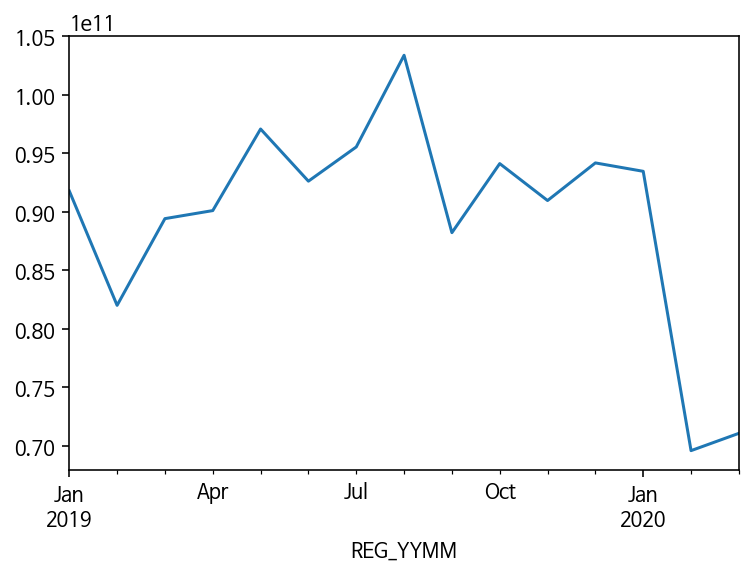

In [12]:
df_alltime.plot()

## 월별 전체 총소비액 변화추이

In [13]:
df_jeju['AGE'].unique() # AGE 범주형 변수의 값 파악하는 메소드 unique()

array(['50s', '30s', '40s', '60s', '70s', '20s', '10s'], dtype=object)

### 월별 20대 총소비액 변화추이

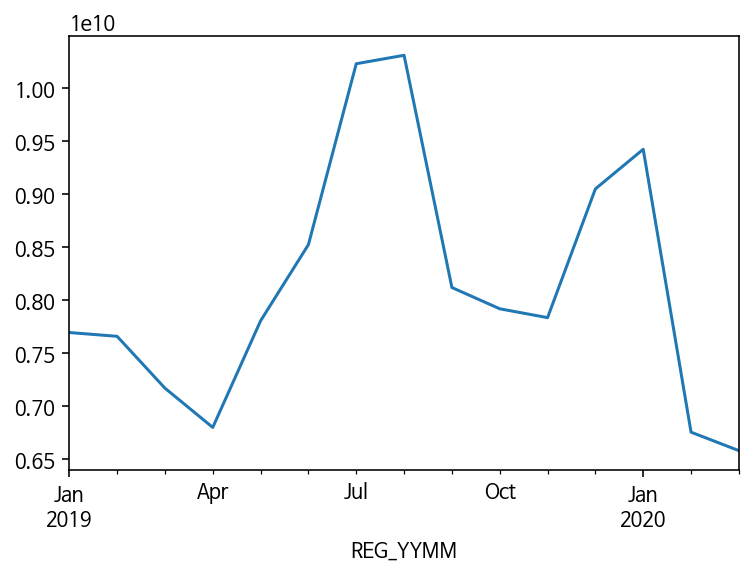

In [14]:
df_jeju2 = df_jeju[df_jeju['AGE']=='20s']
df_jeju2_graph = df_jeju2.groupby('REG_YYMM')['AMT'].sum()
df_jeju2_graph.plot()

### 월별 30대 총소비액 변화추이

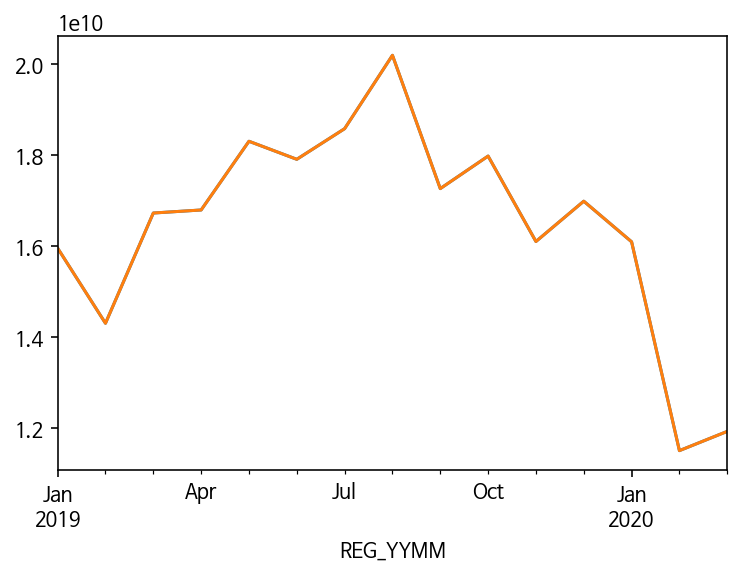

In [15]:
df_jeju3 = df_jeju[df_jeju['AGE']=='30s']
df_jeju3_graph = df_jeju3.groupby('REG_YYMM')['AMT'].sum()
df_jeju3_graph.plot()
grid1=df_jeju3_graph.plot()

### 월별 40대 총소비액 변화추이


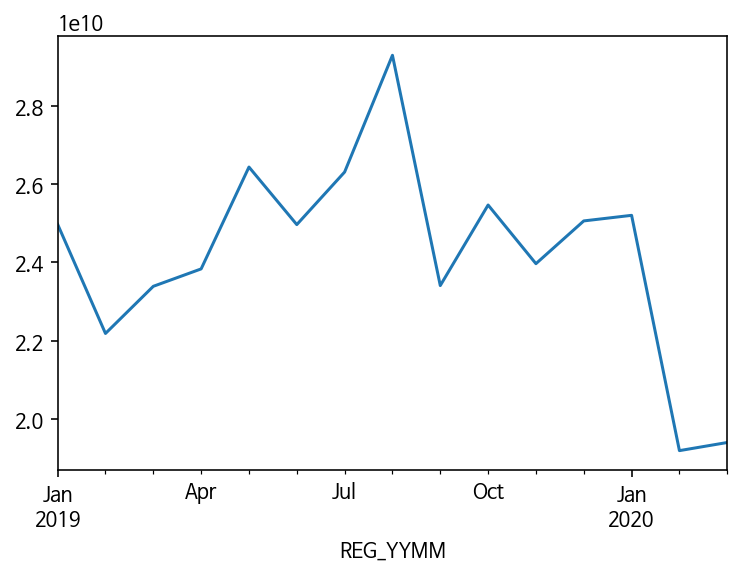

In [16]:
df_jeju4= df_jeju[df_jeju['AGE']=='40s']
df_jeju4_graph = df_jeju4.groupby('REG_YYMM')['AMT'].sum()
grid2=df_jeju4_graph.plot()
# grid2=df_jeju3_graph.plot()

### 월별 50대 총소비액 변화추이


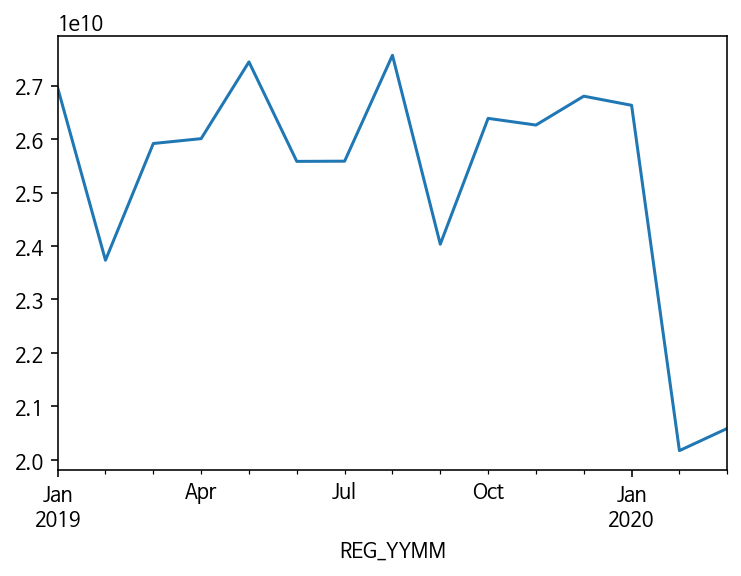

In [17]:
df_jeju5= df_jeju[df_jeju['AGE']=='50s']
df_jeju5_graph = df_jeju5.groupby('REG_YYMM')['AMT'].sum()
df_jeju5_graph.plot()

### 월별 60대 총소비액 변화추이


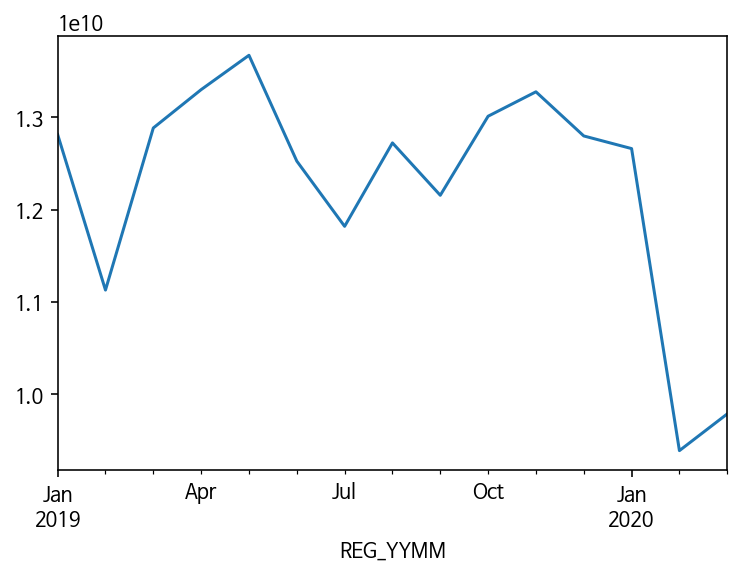

In [18]:
df_jeju6= df_jeju[df_jeju['AGE']=='60s']
df_jeju6_graph = df_jeju6.groupby('REG_YYMM')['AMT'].sum()
df_jeju6_graph.plot()

### 월별 70대 총소비액 변화추이


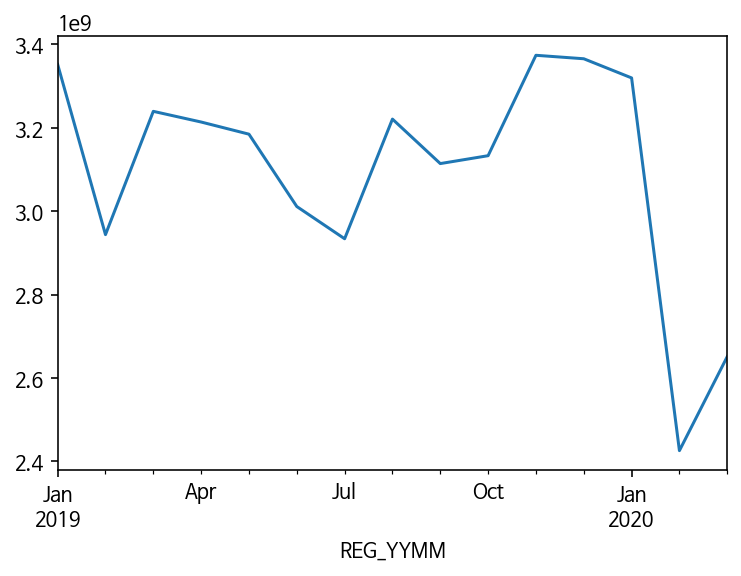

In [19]:
df_jeju7= df_jeju[df_jeju['AGE']=='70s']
df_jeju7_graph = df_jeju7.groupby('REG_YYMM')['AMT'].sum()
df_jeju7_graph.plot()

### 성별 평균 사용금액

Text(0, 0.5, 'mean')

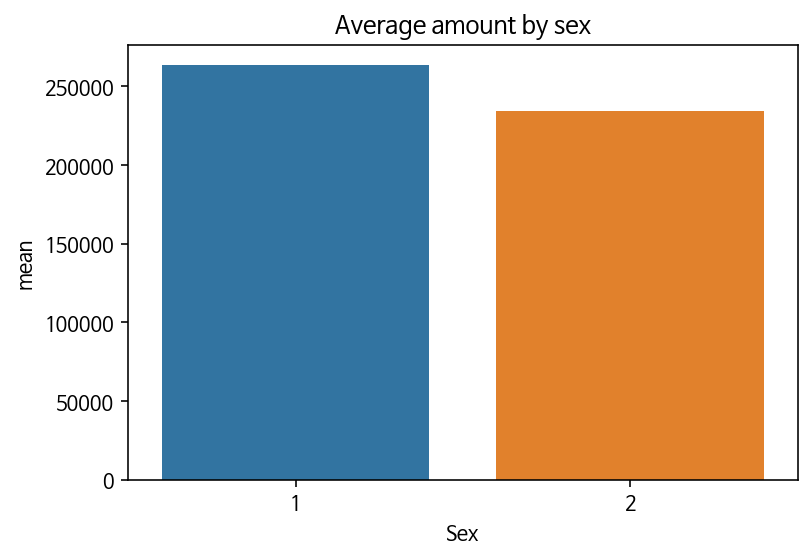

In [20]:
df_sex=plt.subplots()
df_sex = sns.countplot('SEX_CTGO_CD', data=df_jeju)
df_sex.set_title('Average amount by sex')
df_sex.set_xlabel('Sex')
df_sex.set_ylabel('mean')

### 연령별 사용금액

Text(0, 0.5, '평균소비액')

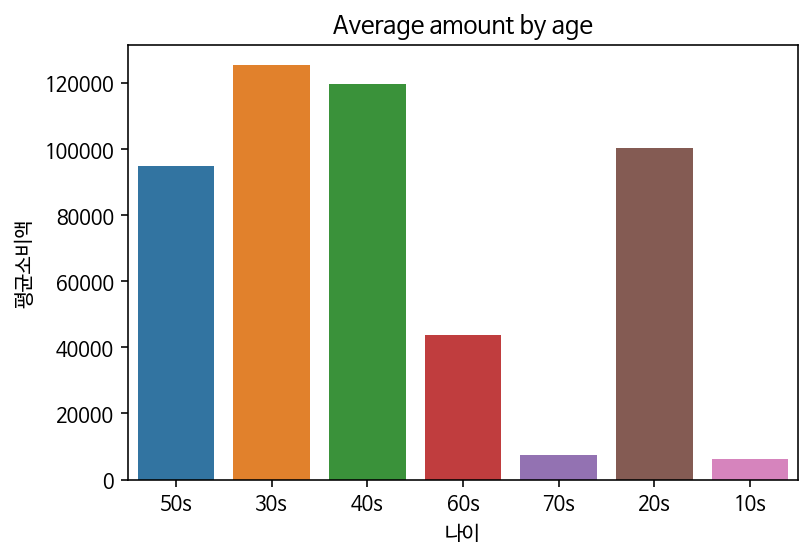

In [21]:
df_sex=plt.subplots()
df_sex = sns.countplot('AGE', data=df_jeju)
df_sex.set_title('Average amount by age')
df_sex.set_xlabel('나이')
df_sex.set_ylabel('평균소비액')

### 거주지역별 평균 사용금액

Text(0, 0.5, 'mean')

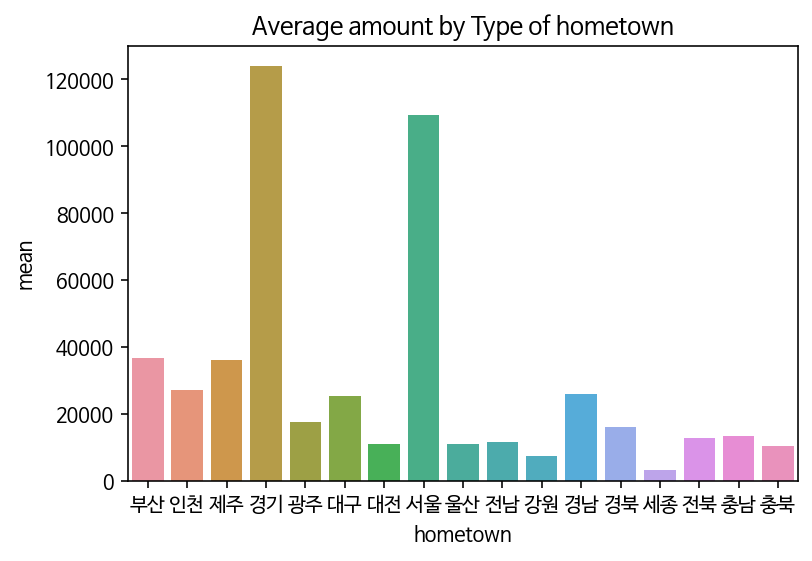

In [22]:
df_sex=plt.subplots()
df_sex = sns.countplot('HOM_SIDO_NM', data=df_jeju)
df_sex.set_title('Average amount by Type of hometown')
df_sex.set_xlabel('hometown')
df_sex.set_ylabel('mean')

In [23]:
signature(sns.countplot)

<Signature (x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [24]:
df_jeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,1454855,2019-01-01,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,1454856,2019-01-01,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,1454857,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,1454858,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,1454859,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497498,24597421,2020-03-01,제주,제주시,휴양콘도 운영업,서울,노원구,50s,1,4,3,79500,3
497499,24597422,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,30s,1,2,4,1656000,5
497500,24597423,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,40s,1,3,3,304560,3
497501,24597424,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,50s,2,4,4,60000,4


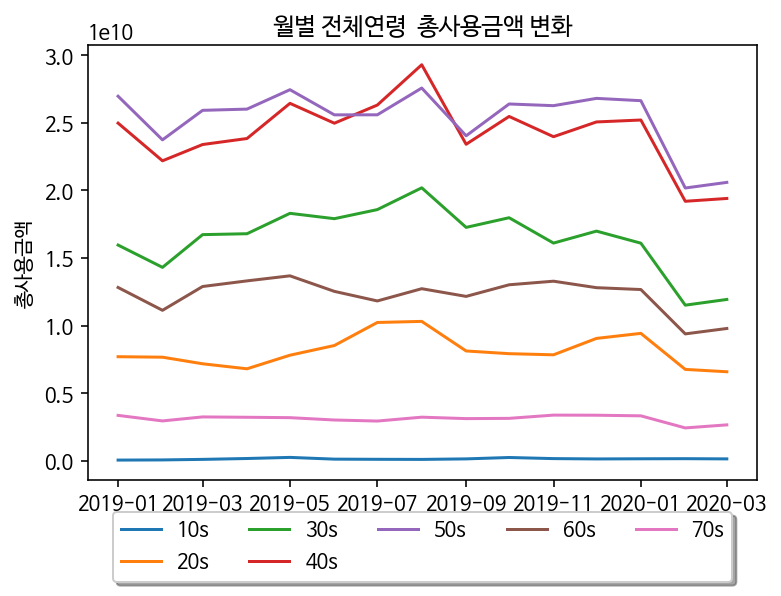

In [25]:
df_jeju1 = df_jeju[df_jeju['AGE']=='10s']
df_jeju2 = df_jeju[df_jeju['AGE']=='20s']
df_jeju3 = df_jeju[df_jeju['AGE']=='30s']
df_jeju4 = df_jeju[df_jeju['AGE']=='40s']
df_jeju5 = df_jeju[df_jeju['AGE']=='50s']
df_jeju6 = df_jeju[df_jeju['AGE']=='60s']
df_jeju7 = df_jeju[df_jeju['AGE']=='70s']
df_jeju1_graph = df_jeju1.groupby('REG_YYMM')['AMT'].sum()
df_jeju2_graph = df_jeju2.groupby('REG_YYMM')['AMT'].sum()
df_jeju3_graph = df_jeju3.groupby('REG_YYMM')['AMT'].sum()
df_jeju4_graph = df_jeju4.groupby('REG_YYMM')['AMT'].sum()
df_jeju5_graph = df_jeju5.groupby('REG_YYMM')['AMT'].sum()
df_jeju6_graph = df_jeju6.groupby('REG_YYMM')['AMT'].sum()
df_jeju7_graph = df_jeju7.groupby('REG_YYMM')['AMT'].sum()


frame = plt.figure()
grid1 = frame.add_subplot()
grid1.plot(df_jeju1_graph)
grid1.plot(df_jeju2_graph)
grid1.plot(df_jeju3_graph)
grid1.plot(df_jeju4_graph)
grid1.plot(df_jeju5_graph)
grid1.plot(df_jeju6_graph)
grid1.plot(df_jeju7_graph)
grid1.set_xlabel('연월')
grid1.set_ylabel('총사용금액')
grid1.set_title('월별 전체연령  총사용금액 변화')
grid1.legend(('10s','20s','30s','40s','50s','60s','70s'),loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

In [26]:
#40ㅡ50대 외부인이 많이 소비하는 업종은 ?
# df_jeju4 = df_jeju[df_jeju['AGE']=='40s']
df_jeju4_nojeju = df_jeju4[df_jeju4['HOM_SIDO_NM']!='제주']
df_jeju4_nojeju
df_jeju4_nojeju_graph = df_jeju4_nojeju.groupby(['REG_YYMM','STD_CLSS_NM'])['AMT'].sum()
df_jeju4_nojeju_graphreset=df_jeju4_nojeju_graph.reset_index()
df_jeju4_nojeju_graphreset
df_jeju4_nojeju_graphreset['rank_AMT'] = df_jeju4_nojeju_graphreset['AMT'].rank(method='min')
df_jeju4_nojeju_graphreset
#2019년 1월 40대 육지인의 업종별 총사용금액 성적표
df_jeju4_nojeju_graphreset_01= df_jeju4_nojeju_graphreset[df_jeju4_nojeju_graphreset['REG_YYMM']=='2019-01-01']
df_jeju4_nojeju_graphreset_01['rank_AMT'] = df_jeju4_nojeju_graphreset_01['AMT'].rank(method='min',ascending = False)
df_jeju4_nojeju_graphreset_01

,REG_YYMM,STD_CLSS_NM,AMT,rank_AMT
0,2019-01-01,골프장 운영업,24476621,21.0
1,2019-01-01,과실 및 채소 소매업,38981720,18.0
2,2019-01-01,관광 민예품 및 선물용품 소매업,45973850,15.0
3,2019-01-01,그외 기타 종합 소매업,9456950,25.0
4,2019-01-01,기타 대형 종합 소매업,168215030,6.0
5,2019-01-01,기타 외국식 음식점업,1162511,33.0
6,2019-01-01,기타음식료품위주종합소매업,49888240,14.0
7,2019-01-01,내항 여객 운송업,16328300,23.0
8,2019-01-01,면세점,1664036567,1.0
9,2019-01-01,비알콜 음료점업,25361100,19.0


In [27]:
signature(sns.lineplot) # 시그니처 함수에 사용할 메소드를 매개변수로 넣으면 메소드에 넣어야할 매개변수가 목록 나온다.

<Signature (x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)>

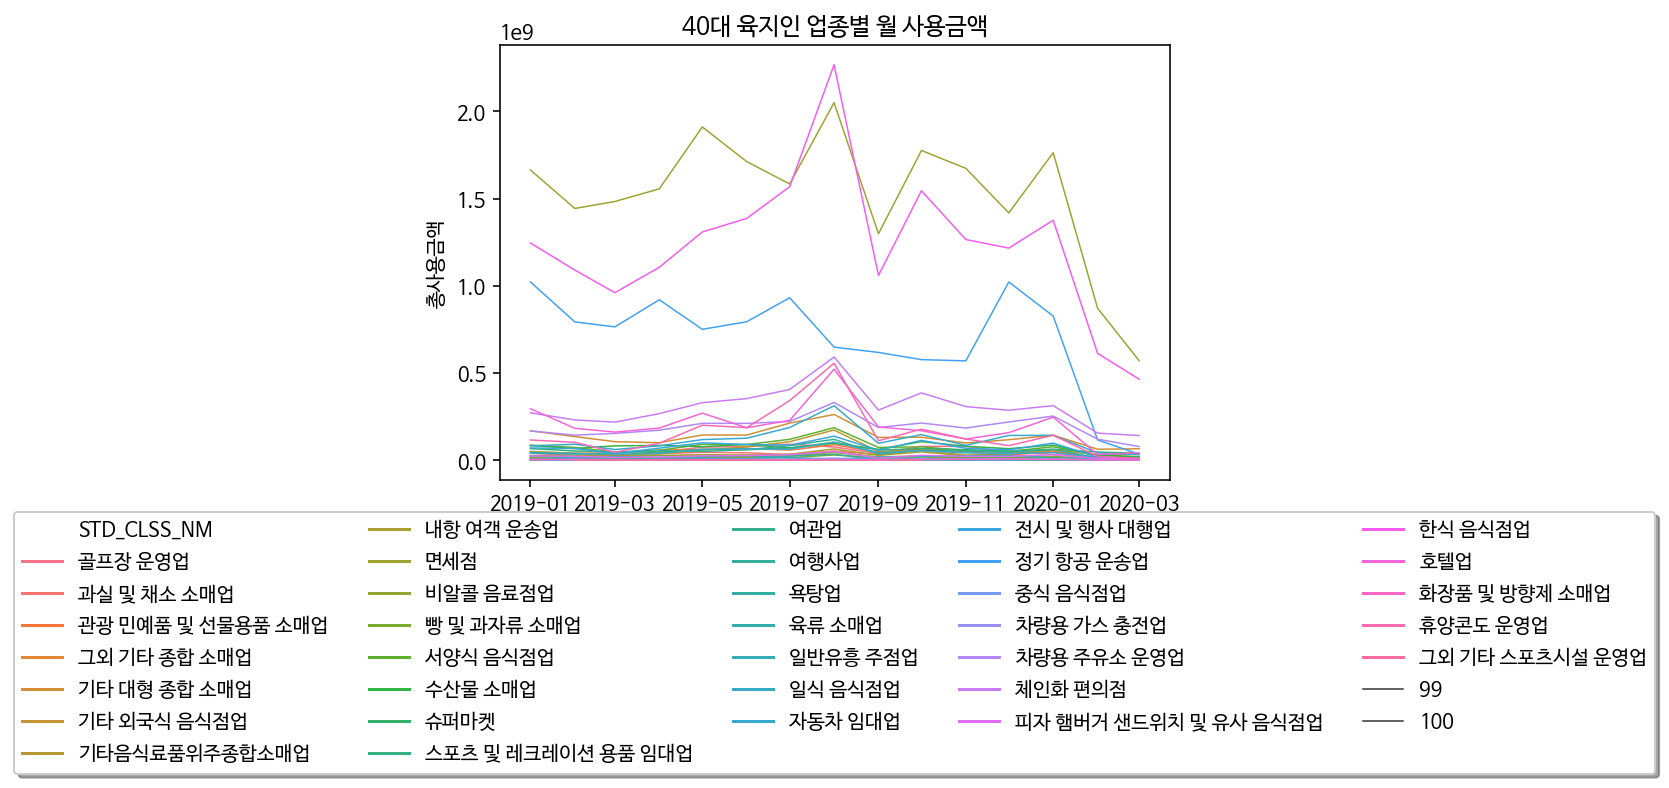

In [28]:
frame_df_jeju4_nojeju = plt.figure()
grid_df_jeju4_nojeju = frame_df_jeju4_nojeju.add_subplot()
# grid_df_jeju4_nojeju.plot(df_jeju4_nojeju_graph)
grid_df_jeju4_nojeju =sns.lineplot(x='REG_YYMM',y='AMT', hue='STD_CLSS_NM',data=df_jeju4_nojeju_graphreset,ci=0, size = 100)
grid_df_jeju4_nojeju.set_xlabel('연월')
grid_df_jeju4_nojeju.set_ylabel('총사용금액')
grid_df_jeju4_nojeju.set_title('40대 육지인 업종별 월 사용금액')
grid_df_jeju4_nojeju.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# plt.rcParams['figure.figsize']=[20,10]
# plt.xticks(fontsize = 20)

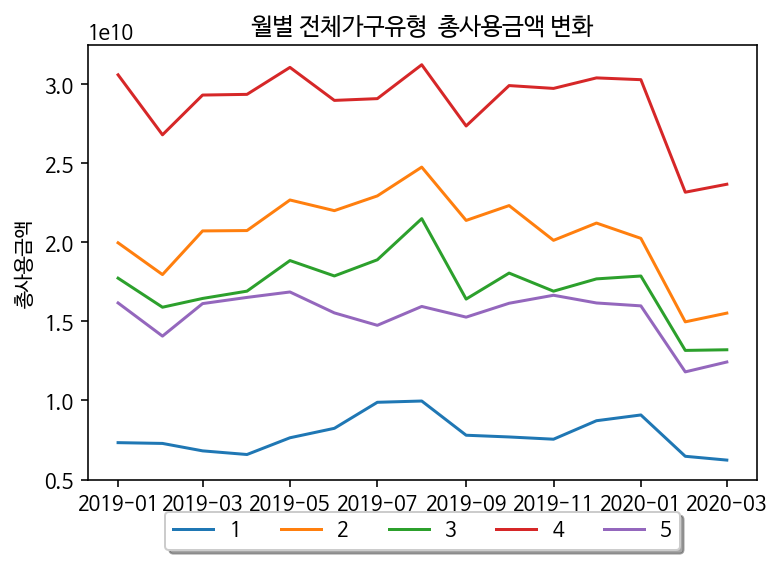

In [29]:
df_jejuf1 = df_jeju[df_jeju['FLC']==1]
df_jejuf2 = df_jeju[df_jeju['FLC']==2]
df_jejuf3 = df_jeju[df_jeju['FLC']==3]
df_jejuf4 = df_jeju[df_jeju['FLC']==4]
df_jejuf5 = df_jeju[df_jeju['FLC']==5]

df_jejuf1_graph = df_jejuf1.groupby('REG_YYMM')['AMT'].sum()
df_jejuf2_graph = df_jejuf2.groupby('REG_YYMM')['AMT'].sum()
df_jejuf3_graph = df_jejuf3.groupby('REG_YYMM')['AMT'].sum()
df_jejuf4_graph = df_jejuf4.groupby('REG_YYMM')['AMT'].sum()
df_jejuf5_graph = df_jejuf5.groupby('REG_YYMM')['AMT'].sum()



frame = plt.figure()
gridf1 = frame.add_subplot()
gridf1.plot(df_jejuf1_graph)
gridf1.plot(df_jejuf2_graph)
gridf1.plot(df_jejuf3_graph)
gridf1.plot(df_jejuf4_graph)
gridf1.plot(df_jejuf5_graph)
gridf1.set_xlabel('연월')
gridf1.set_ylabel('총사용금액')
gridf1.set_title('월별 전체가구유형  총사용금액 변화')
gridf1.legend((1,2,3,4,5),loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

In [30]:
df_jejuf1_graph

REG_YYMM
2019-01-01    7331918991
2019-02-01    7282916363
2019-03-01    6813115065
2019-04-01    6582086113
2019-05-01    7640586380
2019-06-01    8238393054
2019-07-01    9883934159
2019-08-01    9964580268
2019-09-01    7801048667
2019-10-01    7691849219
2019-11-01    7549848758
2019-12-01    8718865305
2020-01-01    9082709767
2020-02-01    6469407194
2020-03-01    6229326093
Name: AMT, dtype: int64

In [31]:
pp(df_jeju['HOM_SIDO_NM'].unique())

array(['부산', '인천', '제주', '경기', '광주', '대구', '대전', '서울', '울산', '전남', '강원',
       '경남', '경북', '세종', '전북', '충남', '충북'], dtype=object)


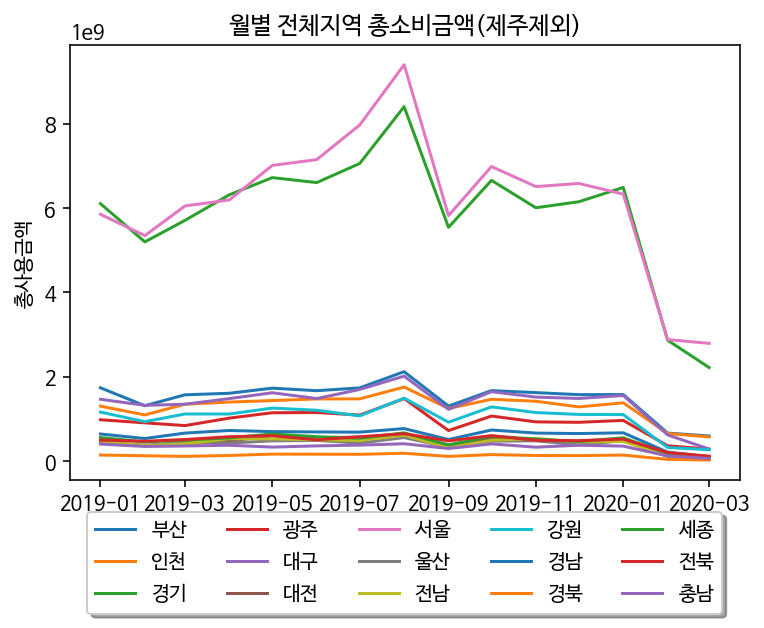

In [32]:
df_jejulo1 = df_jeju[df_jeju['HOM_SIDO_NM']=='부산']
df_jejulo2 = df_jeju[df_jeju['HOM_SIDO_NM']=='인천']
# df_jejulo3 = df_jeju[df_jeju['HOM_SIDO_NM']=='제주']
df_jejulo4 = df_jeju[df_jeju['HOM_SIDO_NM']=='경기']
df_jejulo5 = df_jeju[df_jeju['HOM_SIDO_NM']=='광주']
df_jejulo6 = df_jeju[df_jeju['HOM_SIDO_NM']=='대구']
df_jejulo7 = df_jeju[df_jeju['HOM_SIDO_NM']=='대전']
df_jejulo8 = df_jeju[df_jeju['HOM_SIDO_NM']=='서울']
df_jejulo9 = df_jeju[df_jeju['HOM_SIDO_NM']=='울산']
df_jejulo10 = df_jeju[df_jeju['HOM_SIDO_NM']=='전남']
df_jejulo11 = df_jeju[df_jeju['HOM_SIDO_NM']=='강원']
df_jejulo12 = df_jeju[df_jeju['HOM_SIDO_NM']=='경남']
df_jejulo13 = df_jeju[df_jeju['HOM_SIDO_NM']=='경북']
df_jejulo14 = df_jeju[df_jeju['HOM_SIDO_NM']=='세종']
df_jejulo15 = df_jeju[df_jeju['HOM_SIDO_NM']=='전북']
df_jejulo16 = df_jeju[df_jeju['HOM_SIDO_NM']=='충남']
df_jejulo17 = df_jeju[df_jeju['HOM_SIDO_NM']=='충북']


df_jejulo1_graph = df_jejulo1.groupby('REG_YYMM')['AMT'].sum()
df_jejulo2_graph = df_jejulo2.groupby('REG_YYMM')['AMT'].sum()
# df_jejulo3_graph = df_jejulo3.groupby('date')['AMT'].sum()
df_jejulo4_graph = df_jejulo4.groupby('REG_YYMM')['AMT'].sum()
df_jejulo5_graph = df_jejulo5.groupby('REG_YYMM')['AMT'].sum()
df_jejulo6_graph = df_jejulo6.groupby('REG_YYMM')['AMT'].sum()
df_jejulo7_graph = df_jejulo7.groupby('REG_YYMM')['AMT'].sum()
df_jejulo8_graph = df_jejulo8.groupby('REG_YYMM')['AMT'].sum()
df_jejulo9_graph = df_jejulo9.groupby('REG_YYMM')['AMT'].sum()
df_jejulo10_graph = df_jejulo10.groupby('REG_YYMM')['AMT'].sum()
df_jejulo11_graph = df_jejulo11.groupby('REG_YYMM')['AMT'].sum()
df_jejulo12_graph = df_jejulo12.groupby('REG_YYMM')['AMT'].sum()
df_jejulo13_graph = df_jejulo13.groupby('REG_YYMM')['AMT'].sum()
df_jejulo14_graph = df_jejulo14.groupby('REG_YYMM')['AMT'].sum()
df_jejulo15_graph = df_jejulo15.groupby('REG_YYMM')['AMT'].sum()
df_jejulo16_graph = df_jejulo16.groupby('REG_YYMM')['AMT'].sum()
df_jejulo17_graph = df_jejulo17.groupby('REG_YYMM')['AMT'].sum()




frame = plt.figure()
gridlo1 = frame.add_subplot()
gridlo1.plot(df_jejulo1_graph)
gridlo1.plot(df_jejulo2_graph)
# gridlo1.plot(df_jejulo3_graph)
gridlo1.plot(df_jejulo4_graph)
gridlo1.plot(df_jejulo5_graph)
gridlo1.plot(df_jejulo6_graph)
gridlo1.plot(df_jejulo7_graph)
gridlo1.plot(df_jejulo8_graph)
gridlo1.plot(df_jejulo9_graph)
gridlo1.plot(df_jejulo10_graph)
gridlo1.plot(df_jejulo12_graph)
gridlo1.plot(df_jejulo13_graph)
gridlo1.plot(df_jejulo14_graph)
gridlo1.plot(df_jejulo15_graph)
gridlo1.plot(df_jejulo16_graph)
gridlo1.plot(df_jejulo17_graph)

gridlo1.set_xlabel('연월')
gridlo1.set_ylabel('총사용금액')
gridlo1.set_title('월별 전체지역 총소비금액(제주제외)')
gridlo1.legend(('부산', '인천', '경기', '광주', '대구', '대전', '서울', '울산', '전남', '강원',
       '경남', '경북', '세종', '전북', '충남', '충북'),loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


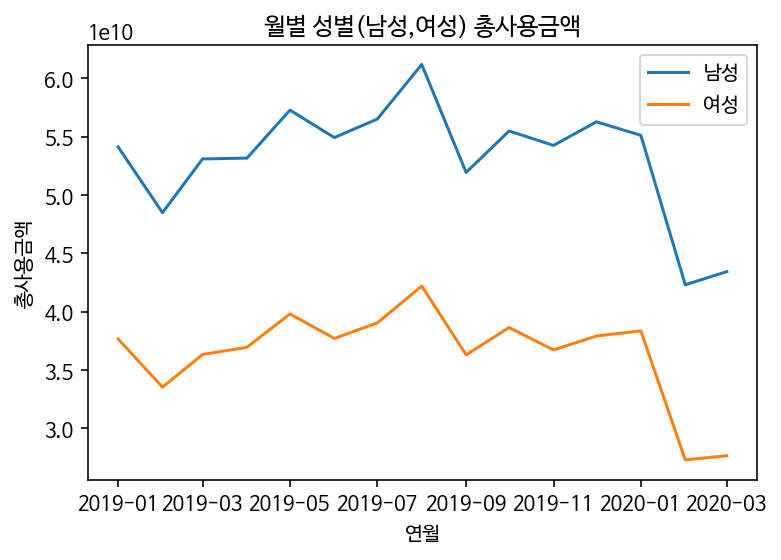

In [33]:
df_jejus1 = df_jeju[df_jeju['SEX_CTGO_CD']==1]
df_jejus2 = df_jeju[df_jeju['SEX_CTGO_CD']==2]

df_jejus1_graph = df_jejus1.groupby('REG_YYMM')['AMT'].sum()
df_jejus2_graph = df_jejus2.groupby('REG_YYMM')['AMT'].sum()



frame = plt.figure()
grids1 = frame.add_subplot()
grids1.plot(df_jejus1_graph)
grids1.plot(df_jejus2_graph)

grids1.set_xlabel('연월')
grids1.set_ylabel('총사용금액')
grids1.set_title('월별 성별(남성,여성) 총사용금액')
grids1.legend(('남성','여성'))

#          bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True)

In [34]:
df_jejus1_graph = df_jejus1.groupby('REG_YYMM')['AMT'].sum()
df_jejus1_graph

REG_YYMM
2019-01-01    54134192799
2019-02-01    48483155858
2019-03-01    53098851454
2019-04-01    53168484231
2019-05-01    57283935802
2019-06-01    54927323973
2019-07-01    56518473822
2019-08-01    61198422766
2019-09-01    51935268289
2019-10-01    55494140206
2019-11-01    54256457087
2019-12-01    56278414467
2020-01-01    55120089885
2020-02-01    42297760285
2020-03-01    43430248248
Name: AMT, dtype: int64

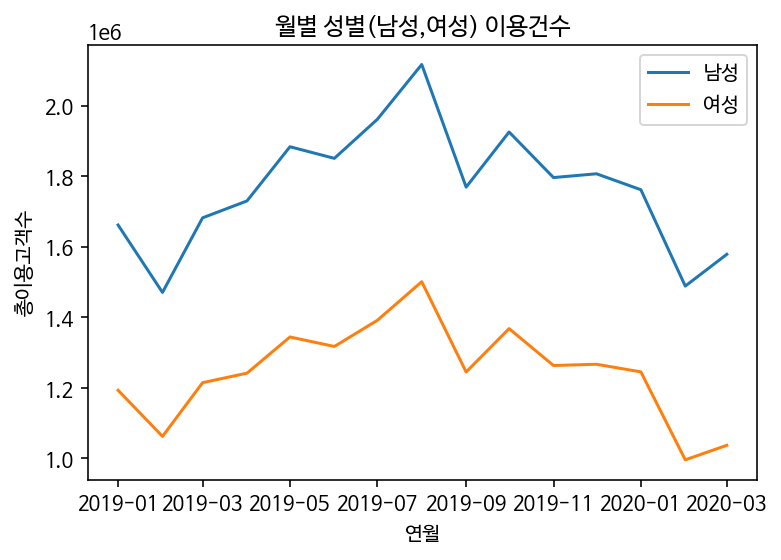

In [35]:
df_jejusc1 = df_jeju[df_jeju['SEX_CTGO_CD']==1]
df_jejusc2 = df_jeju[df_jeju['SEX_CTGO_CD']==2]

df_jejusc1_graph = df_jejusc1.groupby('REG_YYMM')['CNT'].sum()
df_jejusc2_graph = df_jejusc2.groupby('REG_YYMM')['CNT'].sum()



frame = plt.figure()
gridsc1 = frame.add_subplot()
gridsc1.plot(df_jejusc1_graph)
gridsc1.plot(df_jejusc2_graph)

gridsc1.set_xlabel('연월')
gridsc1.set_ylabel('총이용고객수')
gridsc1.set_title('월별 성별(남성,여성) 이용건수')
gridsc1.legend(('남성','여성' ))
#          bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

In [36]:
df_jeju.groupby('HOM_SIDO_NM').count()

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
HOM_SIDO_NM,,,,,,,,,,,,
강원,7340,7340,7340,7340,7340,7340,7340,7340,7340,7340,7340,7340
경기,123898,123898,123898,123898,123898,123898,123898,123898,123898,123898,123898,123898
경남,25946,25946,25946,25946,25946,25946,25946,25946,25946,25946,25946,25946
경북,16048,16048,16048,16048,16048,16048,16048,16048,16048,16048,16048,16048
광주,17382,17382,17382,17382,17382,17382,17382,17382,17382,17382,17382,17382
대구,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166
대전,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996
부산,36721,36721,36721,36721,36721,36721,36721,36721,36721,36721,36721,36721
서울,109454,109454,109454,109454,109454,109454,109454,109454,109454,109454,109454,109454


In [38]:
df_jeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,1454855,2019-01-01,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,1454856,2019-01-01,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,1454857,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,1454858,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,1454859,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497498,24597421,2020-03-01,제주,제주시,휴양콘도 운영업,서울,노원구,50s,1,4,3,79500,3
497499,24597422,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,30s,1,2,4,1656000,5
497500,24597423,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,40s,1,3,3,304560,3
497501,24597424,2020-03-01,제주,제주시,휴양콘도 운영업,제주,제주시,50s,2,4,4,60000,4


In [39]:
##제주도 업종현황
df_jeju.STD_CLSS_NM.unique()
# .reset_index()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '면세점', '비알콜 음료점업',
       '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업',
       '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업',
       '전시 및 행사 대행업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점',
       '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업',
       '휴양콘도 운영업', '마사지업', '자동차 임대업', '정기 항공 운송업', '기타 수상오락 서비스업',
       '그외 기타 분류안된 오락관련 서비스업', '택시 운송업'], dtype=object)

In [40]:
#날짜별, 업종별, 시별 분류
df_jeju_industry=df_jeju.groupby('REG_YYMM').sum()
df_jeju_industry.reset_index()
df_jeju_industry

,Unnamed: 0,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
REG_YYMM,,,,,,
2019-01-01,49709574680,49863,92985,1586427,91789319740,2854687
2019-02-01,97059633299,46792,85253,1477783,82004797730,2532913
2019-03-01,158041481703,49693,93695,1601447,89420874275,2896660
2019-04-01,221117292895,51376,98882,1631849,90108511963,2971499
2019-05-01,296760972620,53830,100704,1766470,97084802656,3227678
2019-06-01,357746958390,53484,98596,1743270,92624250758,3167847
2019-07-01,422865029841,53706,94916,1823971,95549689709,3352647
2019-08-01,560847083741,61135,110193,1988338,103389371548,3617459
2019-09-01,486987940478,47337,84988,1641538,88220834270,3013985


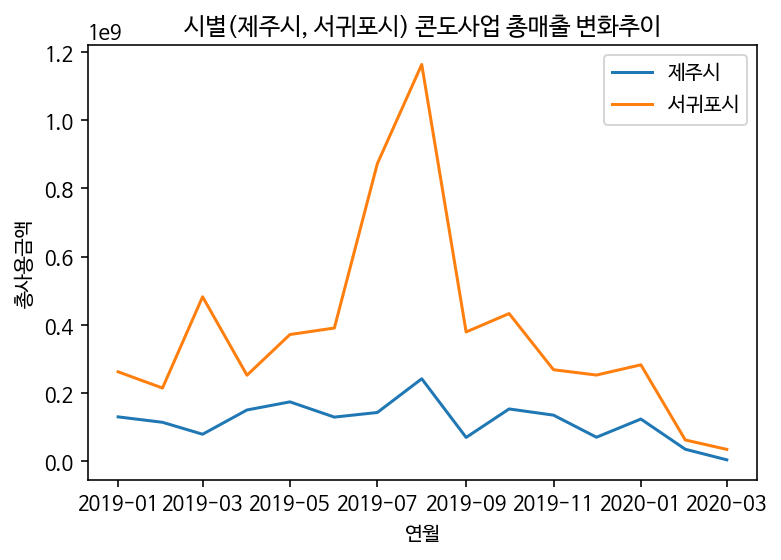

In [41]:
df_jejucondo = df_jeju[df_jeju['STD_CLSS_NM']=='휴양콘도 운영업']
df_jejuhotel = df_jeju[df_jeju['STD_CLSS_NM']=='호텔업']
df_jejuyeogwan = df_jeju[df_jeju['STD_CLSS_NM']=='여관업']

# (1)휴앙콘도 운영업 시도별 비교 위한 데이터프레임 출력
df_jejucondo_jejusi = df_jejucondo[df_jejucondo['CARD_CCG_NM']=='제주시']
df_jejucondo_sgp = df_jejucondo[df_jejucondo['CARD_CCG_NM']=='서귀포시']

df_jejucondo_jejusi_graph = df_jejucondo_jejusi.groupby('REG_YYMM')['AMT'].sum()
df_jejucondo_sgp_graph = df_jejucondo_sgp.groupby('REG_YYMM')['AMT'].sum()

frame_jejucondo = plt.figure()
gridjejucondo = frame_jejucondo.add_subplot()
gridjejucondo.plot(df_jejucondo_jejusi_graph)
gridjejucondo.plot(df_jejucondo_sgp_graph)

gridjejucondo.set_xlabel('연월')
gridjejucondo.set_ylabel('총사용금액')
gridjejucondo.set_title('시별(제주시, 서귀포시) 콘도사업 총매출 변화추이')
gridjejucondo.legend(('제주시','서귀포시'))

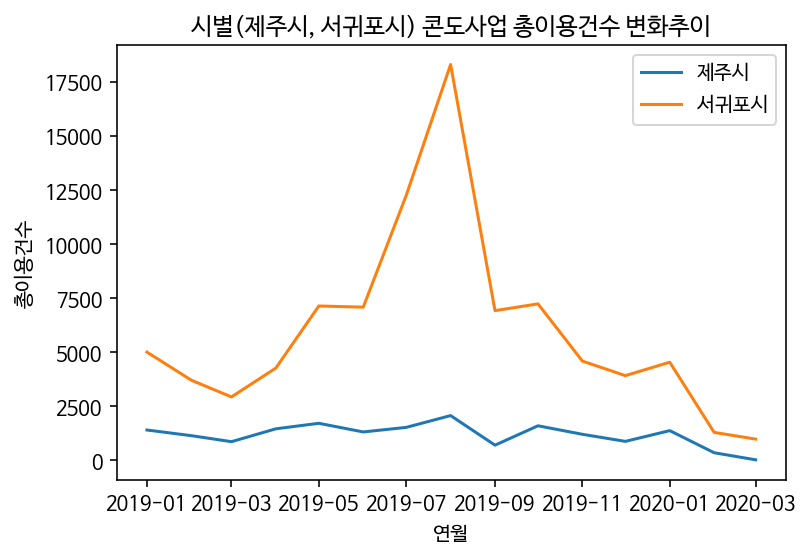

In [42]:
# (1)휴앙콘도 운영업 시도별 비교 위한 데이터프레임 출력
df_jejucondo_jejusi = df_jejucondo[df_jejucondo['CARD_CCG_NM']=='제주시']
df_jejucondo_sgp = df_jejucondo[df_jejucondo['CARD_CCG_NM']=='서귀포시']

df_jejucondo_jejusi_graph2 = df_jejucondo_jejusi.groupby('REG_YYMM')['CNT'].sum()
df_jejucondo_sgp_graph2 = df_jejucondo_sgp.groupby('REG_YYMM')['CNT'].sum()

frame_jejucondo = plt.figure()
gridjejucondo = frame_jejucondo.add_subplot()
gridjejucondo.plot(df_jejucondo_jejusi_graph2)
gridjejucondo.plot(df_jejucondo_sgp_graph2)

gridjejucondo.set_xlabel('연월')
gridjejucondo.set_ylabel('총이용건수')
gridjejucondo.set_title('시별(제주시, 서귀포시) 콘도사업 총이용건수 변화추이')
gridjejucondo.legend(('제주시','서귀포시'))

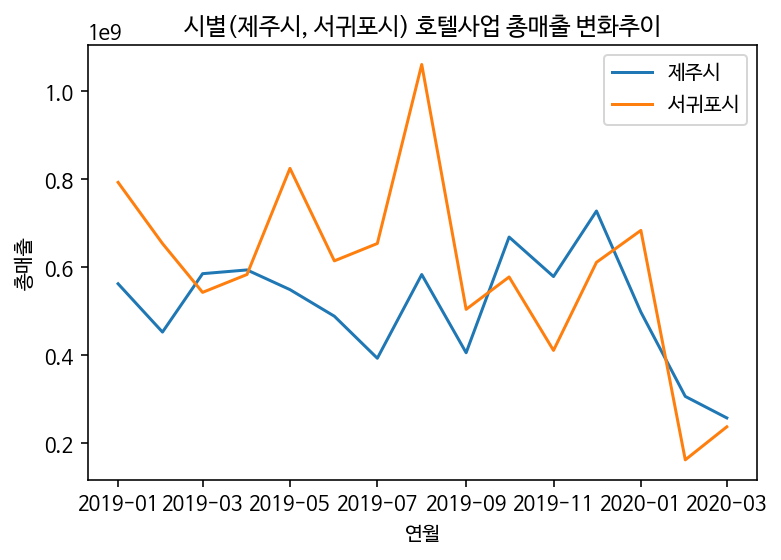

In [43]:
# (2) 호텔업 시도별 비교 위한 데이터프레임 출력
df_jejuhotel_jejusi = df_jejuhotel[df_jejuhotel['CARD_CCG_NM']=='제주시']
df_jejuhotel_sgp = df_jejuhotel[df_jejuhotel['CARD_CCG_NM']=='서귀포시']

df_jejuhotel_jejusi_graph = df_jejuhotel_jejusi.groupby('REG_YYMM')['AMT'].sum()
df_jejuhotel_sgp_graph = df_jejuhotel_sgp.groupby('REG_YYMM')['AMT'].sum()

frame_jejuhotel = plt.figure()
gridjejuhotel = frame_jejuhotel.add_subplot()
gridjejuhotel.plot(df_jejuhotel_jejusi_graph)
gridjejuhotel.plot(df_jejuhotel_sgp_graph)

gridjejuhotel.set_xlabel('연월')
gridjejuhotel.set_ylabel('총매출')
gridjejuhotel.set_title('시별(제주시, 서귀포시) 호텔사업 총매출 변화추이')
gridjejuhotel.legend(('제주시','서귀포시'))

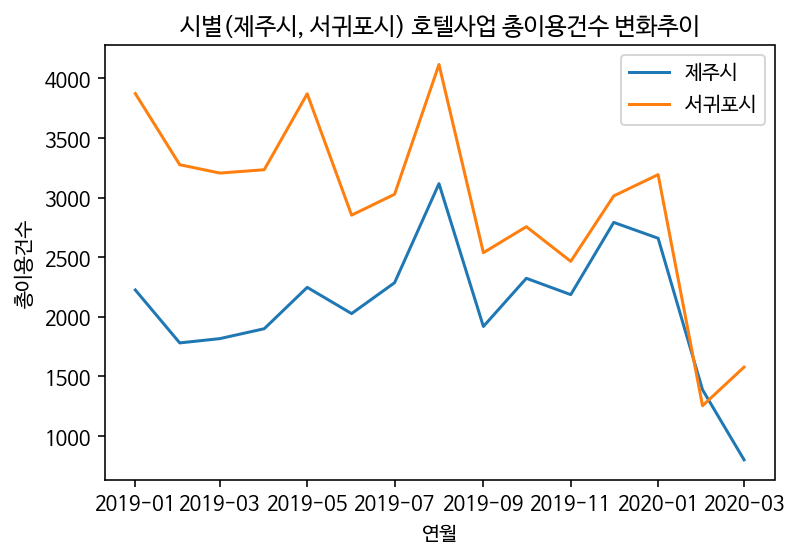

In [44]:
df_jejuhotel_jejusi = df_jejuhotel[df_jejuhotel['CARD_CCG_NM']=='제주시']
df_jejuhotel_sgp = df_jejuhotel[df_jejuhotel['CARD_CCG_NM']=='서귀포시']

df_jejuhotel_jejusi_graph = df_jejuhotel_jejusi.groupby('REG_YYMM')['AMT'].sum()
df_jejuhotel_sgp_graph = df_jejuhotel_sgp.groupby('REG_YYMM')['AMT'].sum()
df_jejuhotel_jejusi_graph2 = df_jejuhotel_jejusi.groupby('REG_YYMM')['CNT'].sum()
df_jejuhotel_sgp_graph2 = df_jejuhotel_sgp.groupby('REG_YYMM')['CNT'].sum()

frame_jejuhotel = plt.figure()
gridjejuhotel = frame_jejuhotel.add_subplot()
gridjejuhotel.plot(df_jejuhotel_jejusi_graph2)
gridjejuhotel.plot(df_jejuhotel_sgp_graph2)

gridjejuhotel.set_xlabel('연월')
gridjejuhotel.set_ylabel('총이용건수')
gridjejuhotel.set_title('시별(제주시, 서귀포시) 호텔사업 총이용건수 변화추이')
gridjejuhotel.legend(('제주시','서귀포시'))

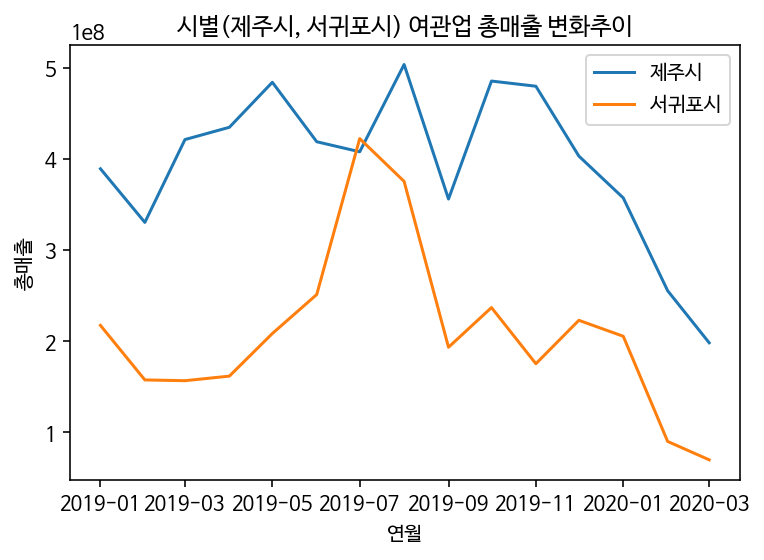

In [45]:
# (3) 여관업 시도별 비교 위한 데이터프레임 출력
df_jejuyeogwan_jejusi = df_jejuyeogwan[df_jejuyeogwan['CARD_CCG_NM']=='제주시']
df_jejuyeogwan_sgp = df_jejuyeogwan[df_jejuyeogwan['CARD_CCG_NM']=='서귀포시']

df_jejuyeogwan_jejusi_graph = df_jejuyeogwan_jejusi.groupby('REG_YYMM')['AMT'].sum()
df_jejuyeogwan_sgp_graph = df_jejuyeogwan_sgp.groupby('REG_YYMM')['AMT'].sum()


frame_jejuyeogwan = plt.figure()
gridjejuyeogwan = frame_jejuyeogwan.add_subplot()
gridjejuyeogwan.plot(df_jejuyeogwan_jejusi_graph)
gridjejuyeogwan.plot(df_jejuyeogwan_sgp_graph)

gridjejuyeogwan.set_xlabel('연월')
gridjejuyeogwan.set_ylabel('총매출')
gridjejuyeogwan.set_title('시별(제주시, 서귀포시) 여관업 총매출 변화추이')
gridjejuyeogwan.legend(('제주시','서귀포시'))

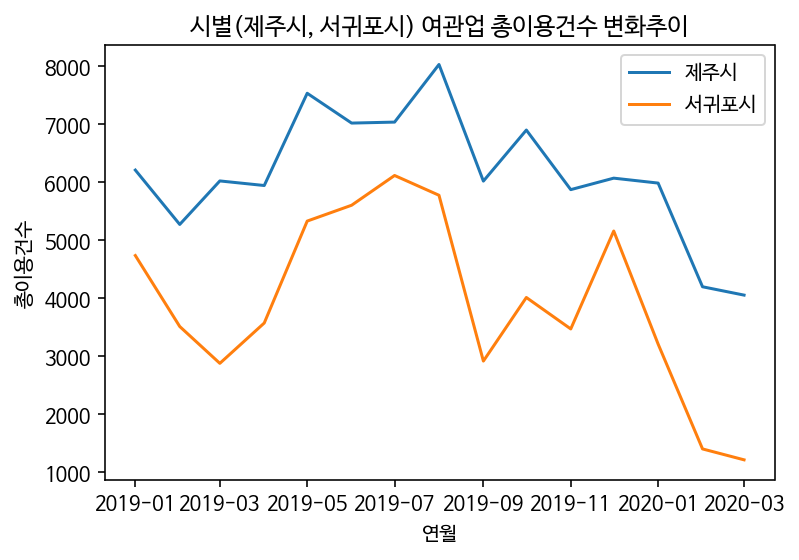

In [46]:
df_jejuyeogwan_jejusi = df_jejuyeogwan[df_jejuyeogwan['CARD_CCG_NM']=='제주시']
df_jejuyeogwan_sgp = df_jejuyeogwan[df_jejuyeogwan['CARD_CCG_NM']=='서귀포시']

df_jejuyeogwan_jejusi_graph2 = df_jejuyeogwan_jejusi.groupby('REG_YYMM')['CNT'].sum()
df_jejuyeogwan_sgp_graph2 = df_jejuyeogwan_sgp.groupby('REG_YYMM')['CNT'].sum()

frame_jejuyeogwan = plt.figure()
gridjejuyeogwan = frame_jejuyeogwan.add_subplot()
gridjejuyeogwan.plot(df_jejuyeogwan_jejusi_graph2)
gridjejuyeogwan.plot(df_jejuyeogwan_sgp_graph2)

gridjejuyeogwan.set_xlabel('연월')
gridjejuyeogwan.set_ylabel('총이용건수')
gridjejuyeogwan.set_title('시별(제주시, 서귀포시) 여관업 총이용건수 변화추이')
gridjejuyeogwan.legend(('제주시','서귀포시'))

In [47]:
df_jejucondo = df_jeju[df_jeju['STD_CLSS_NM']=='휴양콘도 운영업']
df_jejuhotel = df_jeju[df_jeju['STD_CLSS_NM']=='호텔업']
df_jejuyeogwan = df_jeju[df_jeju['STD_CLSS_NM']=='여관업']
df_jejuacco = pd.concat([df_jejucondo,df_jejuhotel,df_jejuyeogwan])


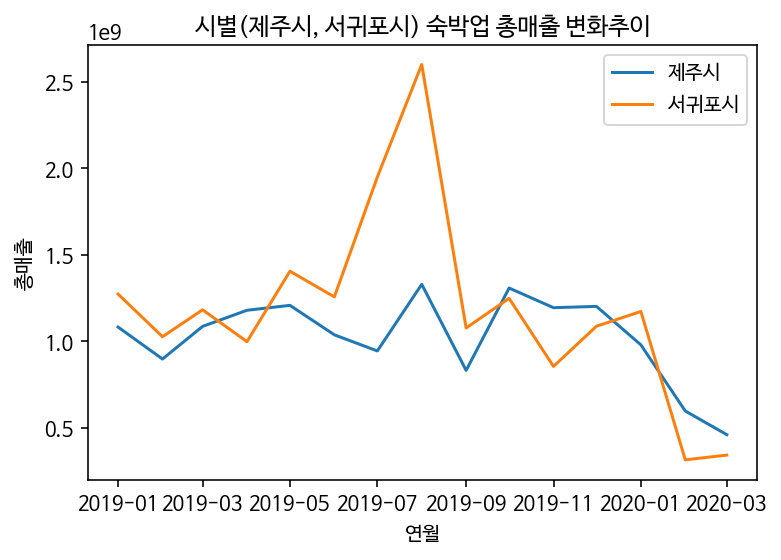

In [48]:
df_jejuacco_jejusi = df_jejuacco[df_jejuacco['CARD_CCG_NM']=='제주시']
df_jejuacco_sgp = df_jejuacco[df_jejuacco['CARD_CCG_NM']=='서귀포시']

df_jejuacco_jejusi_graph = df_jejuacco_jejusi.groupby('REG_YYMM')['AMT'].sum()
df_jejuacco_sgp_graph = df_jejuacco_sgp.groupby('REG_YYMM')['AMT'].sum()

frame_jejuacco = plt.figure()
gridjejuacco = frame_jejuacco.add_subplot()
gridjejuacco.plot(df_jejuacco_jejusi_graph)
gridjejuacco.plot(df_jejuacco_sgp_graph)

gridjejuacco.set_xlabel('연월')
gridjejuacco.set_ylabel('총매출')
gridjejuacco.set_title('시별(제주시, 서귀포시) 숙박업 총매출 변화추이')
gridjejuacco.legend(('제주시','서귀포시'))

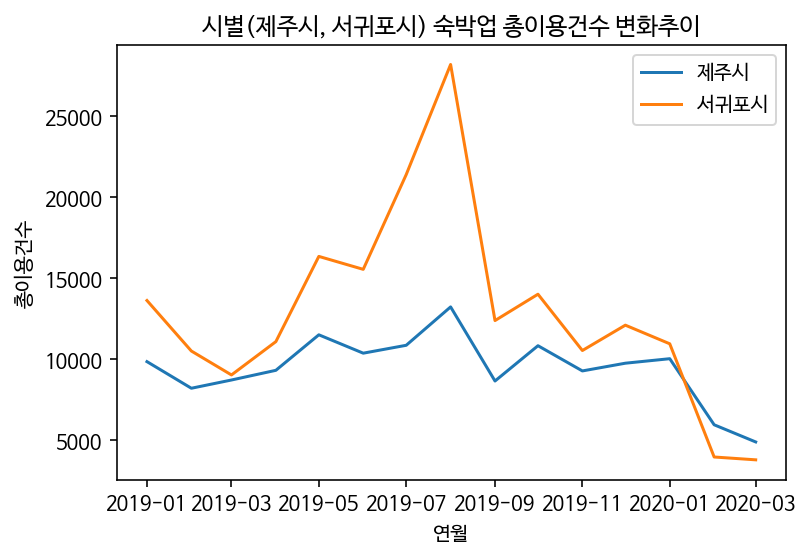

In [49]:
df_jejuacco_jejusi = df_jejuacco[df_jejuacco['CARD_CCG_NM']=='제주시']
df_jejuacco_sgp = df_jejuacco[df_jejuacco['CARD_CCG_NM']=='서귀포시']
df_jejuhotel_jejusi = df_jejuhotel[df_jejuhotel['CARD_CCG_NM']=='제주시']
df_jejuhotel_sgp = df_jejuhotel[df_jejuhotel['CARD_CCG_NM']=='서귀포시']

df_jejuacco_jejusi_graph2 = df_jejuacco_jejusi.groupby('REG_YYMM')['CNT'].sum()
df_jejuacco_sgp_graph2 = df_jejuacco_sgp.groupby('REG_YYMM')['CNT'].sum()

frame_jejuacco = plt.figure()
gridjejuacco = frame_jejuacco.add_subplot()
gridjejuacco.plot(df_jejuacco_jejusi_graph2)
gridjejuacco.plot(df_jejuacco_sgp_graph2)

gridjejuacco.set_xlabel('연월')
gridjejuacco.set_ylabel('총이용건수')
gridjejuacco.set_title('시별(제주시, 서귀포시) 숙박업 총이용건수 변화추이')
gridjejuacco.legend(('제주시','서귀포시'))

plt.show()

In [50]:
df_jeju.head()

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,1454855,2019-01-01,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,1454856,2019-01-01,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,1454857,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,1454858,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,1454859,2019-01-01,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3


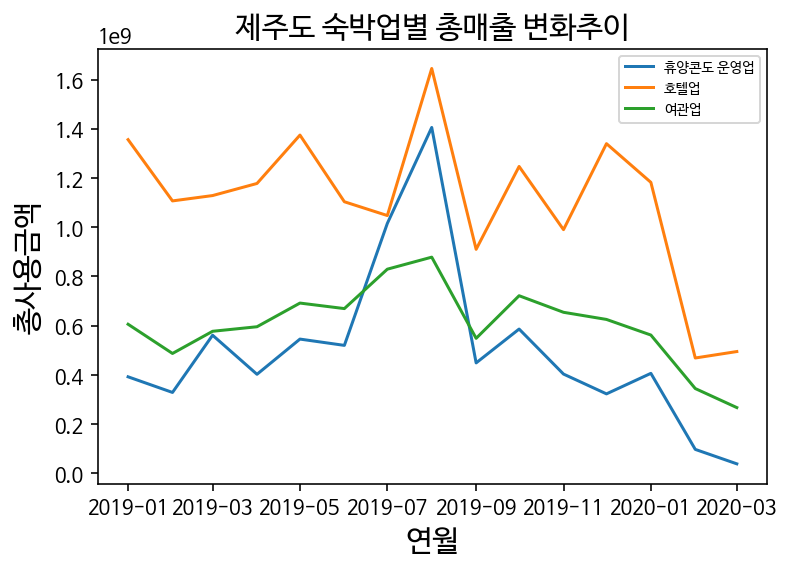

In [67]:
# 숙박업간 비교
# df_jejucondo = df_jeju[df_jeju['STD_CLSS_NM']=='휴양콘도 운영업']
# df_jejuhotel = df_jeju[df_jeju['STD_CLSS_NM']=='호텔업']
# df_jejuyeogwan = df_jeju[df_jeju['STD_CLSS_NM']=='여관업']

# (1)휴앙콘도 운영업 시도별 비교 위한 데이터프레임 출력
# df_jejucondo_jejusi = df_jejucondo[df_jejucondo['CARD_CCG_NM']=='제주시']
# df_jejucondo_sgp = df_jejucondo[df_jejucondo['CARD_CCG_NM']=='서귀포시']

df_jejucondo_graph = df_jejucondo.groupby('REG_YYMM')['AMT'].sum()
df_jejuhotel_graph = df_jejuhotel.groupby('REG_YYMM')['AMT'].sum()
df_jejuyeogwan_graph = df_jejuyeogwan.groupby('REG_YYMM')['AMT'].sum()


frame_jejuacco3vs = plt.figure()
gridjejuacco3vs = frame_jejuacco3vs.add_subplot()
gridjejuacco3vs.plot(df_jejucondo_graph)
gridjejuacco3vs.plot(df_jejuhotel_graph)
gridjejuacco3vs.plot(df_jejuyeogwan_graph)



gridjejuacco3vs.set_xlabel('연월', fontsize=15)
gridjejuacco3vs.set_ylabel('총사용금액', fontsize=15)
gridjejuacco3vs.set_title('제주도 숙박업별 총매출 변화추이', fontsize=15)
gridjejuacco3vs.legend(('휴양콘도 운영업','호텔업','여관업'), fontsize=7)

plt.show()

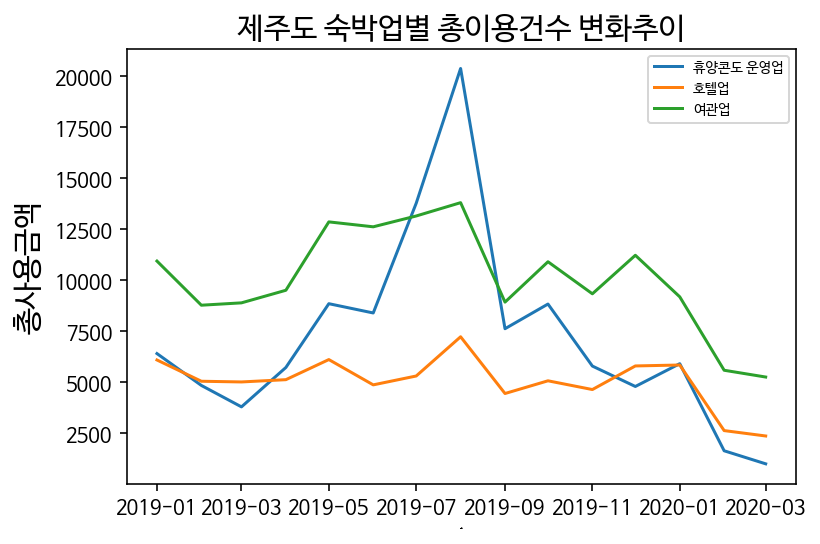

In [68]:
df_jejucondo_graphc = df_jejucondo.groupby('REG_YYMM')['CNT'].sum()
df_jejuhotel_graphc = df_jejuhotel.groupby('REG_YYMM')['CNT'].sum()
df_jejuyeogwan_graphc = df_jejuyeogwan.groupby('REG_YYMM')['CNT'].sum()


frame_jejuacco3vsc = plt.figure()
gridjejuacco3vsc = frame_jejuacco3vsc.add_subplot()
gridjejuacco3vsc.plot(df_jejucondo_graphc)
gridjejuacco3vsc.plot(df_jejuhotel_graphc)
gridjejuacco3vsc.plot(df_jejuyeogwan_graphc)



gridjejuacco3vsc.set_xlabel('연월', fontsize=1)
gridjejuacco3vsc.set_ylabel('총사용금액', fontsize=15)
gridjejuacco3vsc.set_title('제주도 숙박업별 총이용건수 변화추이', fontsize=15)
gridjejuacco3vsc.legend(('휴양콘도 운영업','호텔업','여관업'), fontsize=7)

plt.show()

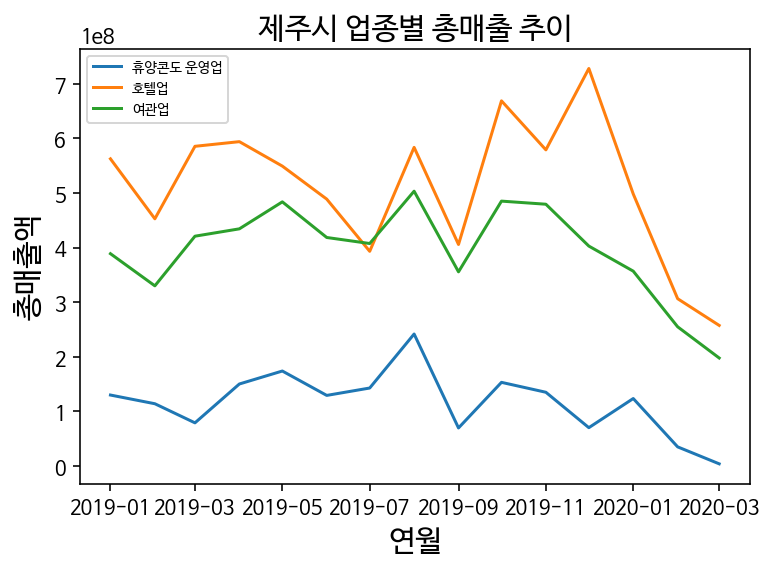

In [69]:
frame_jejusiacco3AMT = plt.figure()
gridjejusiacco3AMT = frame_jejusiacco3AMT.add_subplot()
gridjejusiacco3AMT.plot(df_jejucondo_jejusi_graph)
gridjejusiacco3AMT.plot(df_jejuhotel_jejusi_graph)
gridjejusiacco3AMT.plot(df_jejuyeogwan_jejusi_graph)

gridjejusiacco3AMT.set_xlabel('연월',fontsize=15)
gridjejusiacco3AMT.set_ylabel('총매출액',fontsize=15)
gridjejusiacco3AMT.set_title('제주시 업종별 총매출 추이',fontsize=15)
gridjejusiacco3AMT.legend(('휴양콘도 운영업','호텔업','여관업'),fontsize=7)

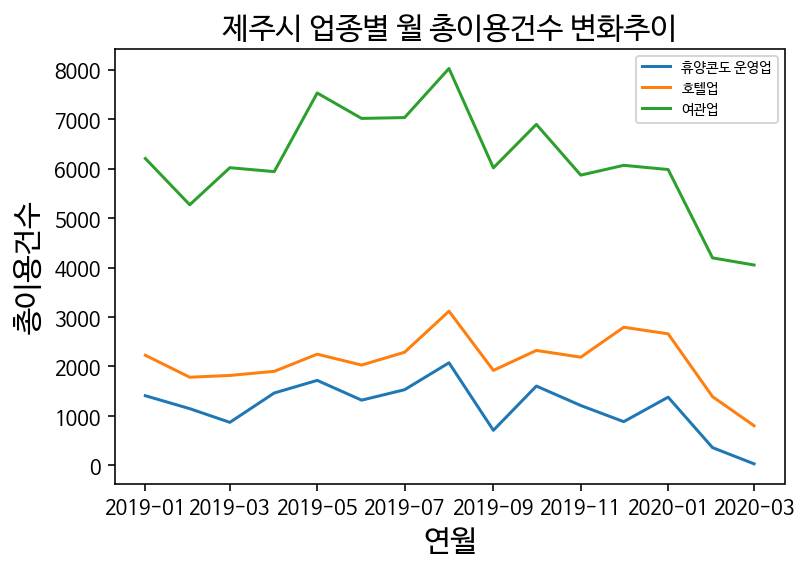

In [70]:
frame_jejusiacco3CNT = plt.figure()
gridjejusiacco3CNT = frame_jejusiacco3CNT.add_subplot()
gridjejusiacco3CNT.plot(df_jejucondo_jejusi_graph2)
gridjejusiacco3CNT.plot(df_jejuhotel_jejusi_graph2)
gridjejusiacco3CNT.plot(df_jejuyeogwan_jejusi_graph2)

gridjejusiacco3CNT.set_xlabel('연월',fontsize=15)
gridjejusiacco3CNT.set_ylabel('총이용건수',fontsize=15)
gridjejusiacco3CNT.set_title('제주시 업종별 월 총이용건수 변화추이',fontsize=15)
gridjejusiacco3CNT.legend(('휴양콘도 운영업','호텔업','여관업',),fontsize=7)

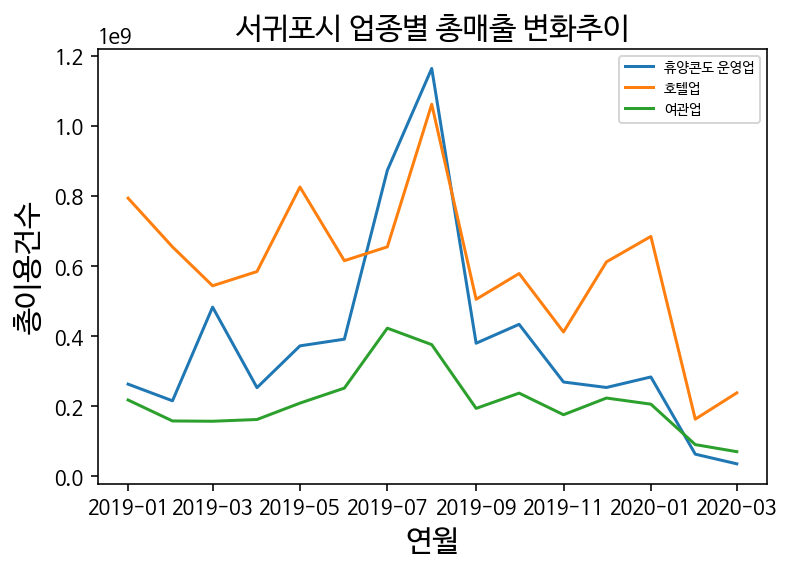

In [72]:
frame_sgpacco3AMT = plt.figure()
gridsgpacco3AMT = frame_sgpacco3AMT.add_subplot()
# gridjejuacco6AMT.plot(df_jejucondo_jejusi_graph)
gridsgpacco3AMT.plot(df_jejucondo_sgp_graph)
# gridjejuacco6AMT.plot(df_jejuhotel_jejusi_graph)
gridsgpacco3AMT.plot(df_jejuhotel_sgp_graph)
# gridjejuacco6AMT.plot(df_jejuyeogwan_jejusi_graph)
gridsgpacco3AMT.plot(df_jejuyeogwan_sgp_graph)

gridsgpacco3AMT.set_xlabel('연월',fontsize=15)
gridsgpacco3AMT.set_ylabel('총이용건수',fontsize=15)
gridsgpacco3AMT.set_title('서귀포시 업종별 총매출 변화추이',fontsize=15)
gridsgpacco3AMT.legend(('휴양콘도 운영업','호텔업','여관업'),fontsize=7)

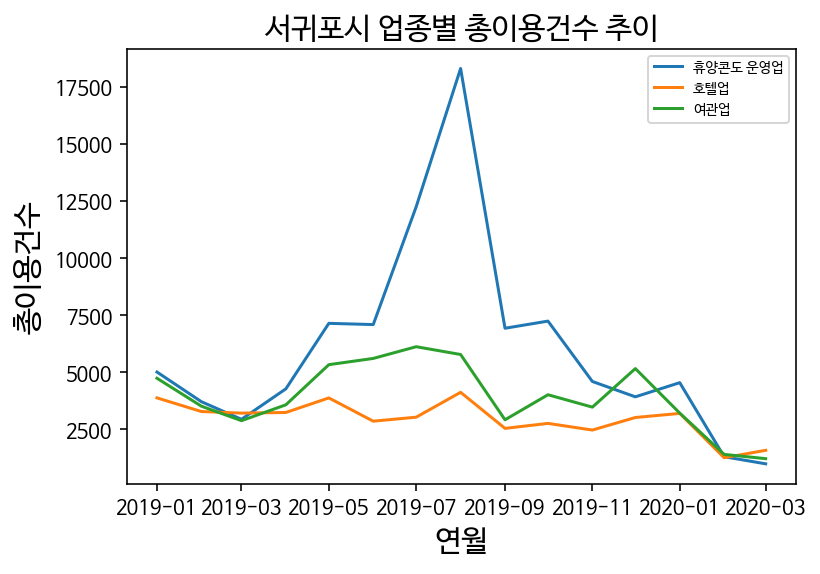

In [73]:
frame_sgpacco3CNT = plt.figure()
gridsgpacco3CNT = frame_sgpacco3CNT.add_subplot()
# gridjejuacco6AMT.plot(df_jejucondo_jejusi_graph)
gridsgpacco3CNT.plot(df_jejucondo_sgp_graph2)
# gridjejuacco6AMT.plot(df_jejuhotel_jejusi_graph)
gridsgpacco3CNT.plot(df_jejuhotel_sgp_graph2)
# gridjejuacco6AMT.plot(df_jejuyeogwan_jejusi_graph)
gridsgpacco3CNT.plot(df_jejuyeogwan_sgp_graph2)

gridsgpacco3CNT.set_xlabel('연월',fontsize=15)
gridsgpacco3CNT.set_ylabel('총이용건수',fontsize=15)
gridsgpacco3CNT.set_title('서귀포시 업종별 총이용건수 추이',fontsize=15)
gridsgpacco3CNT.legend(('휴양콘도 운영업','호텔업','여관업'),fontsize=7)

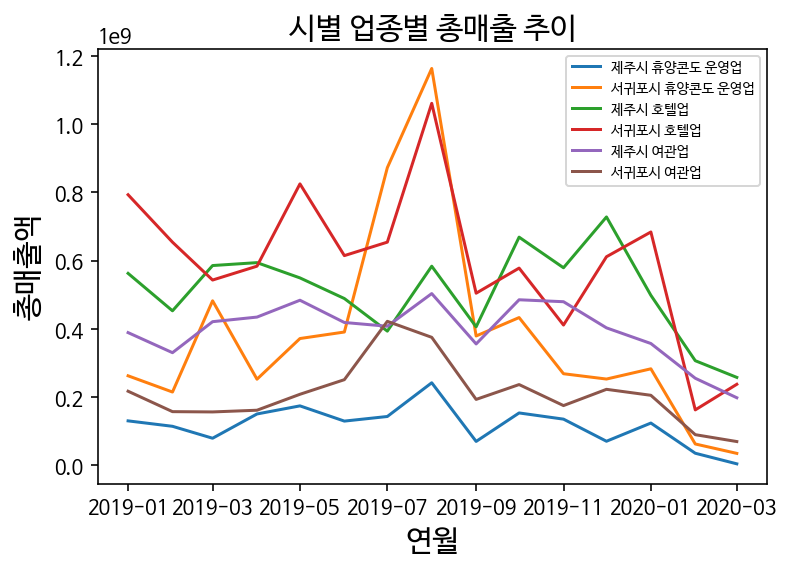

In [76]:
#시별 업종별 총매출 추이
frame_jejuacco6AMT = plt.figure()
gridjejuacco6AMT = frame_jejuacco6AMT.add_subplot()
gridjejuacco6AMT.plot(df_jejucondo_jejusi_graph)
gridjejuacco6AMT.plot(df_jejucondo_sgp_graph)
gridjejuacco6AMT.plot(df_jejuhotel_jejusi_graph)
gridjejuacco6AMT.plot(df_jejuhotel_sgp_graph)
gridjejuacco6AMT.plot(df_jejuyeogwan_jejusi_graph)
gridjejuacco6AMT.plot(df_jejuyeogwan_sgp_graph)

gridjejuacco6AMT.set_xlabel('연월',fontsize=15)
gridjejuacco6AMT.set_ylabel('총매출액',fontsize=15)
gridjejuacco6AMT.set_title('시별 업종별 총매출 추이',fontsize=15)
gridjejuacco6AMT.legend(('제주시 휴양콘도 운영업','서귀포시 휴양콘도 운영업','제주시 호텔업','서귀포시 호텔업','제주시 여관업','서귀포시 여관업'),fontsize=7)

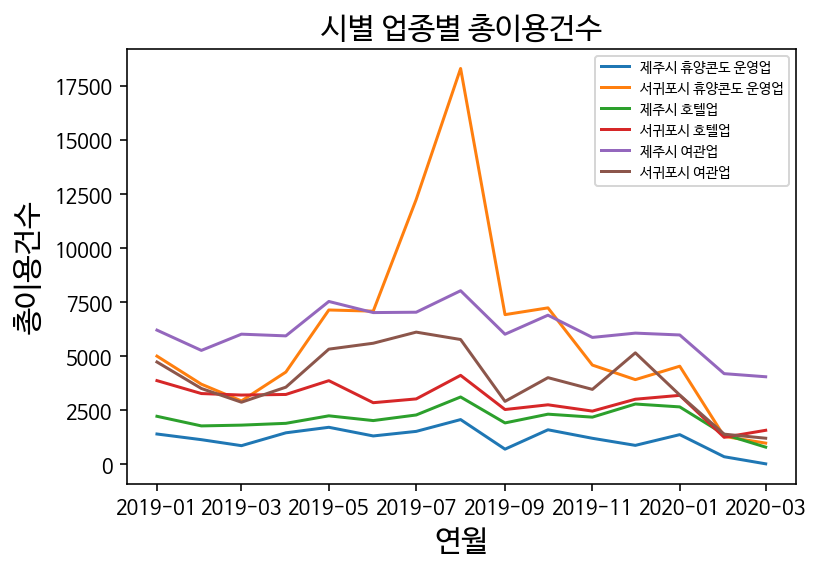

In [78]:
frame_jejuacco6CNT = plt.figure()
gridjejuacco6CNT = frame_jejuacco6CNT.add_subplot()
gridjejuacco6CNT.plot(df_jejucondo_jejusi_graph2)
gridjejuacco6CNT.plot(df_jejucondo_sgp_graph2)
gridjejuacco6CNT.plot(df_jejuhotel_jejusi_graph2)
gridjejuacco6CNT.plot(df_jejuhotel_sgp_graph2)
gridjejuacco6CNT.plot(df_jejuyeogwan_jejusi_graph2)
gridjejuacco6CNT.plot(df_jejuyeogwan_sgp_graph2)

gridjejuacco6CNT.set_xlabel('연월',fontsize=15)
gridjejuacco6CNT.set_ylabel('총이용건수',fontsize=15)
gridjejuacco6CNT.set_title('시별 업종별 총이용건수',fontsize=15)
gridjejuacco6CNT.legend(('제주시 휴양콘도 운영업','서귀포시 휴양콘도 운영업','제주시 호텔업','서귀포시 호텔업','제주시 여관업','서귀포시 여관업'),fontsize=7)

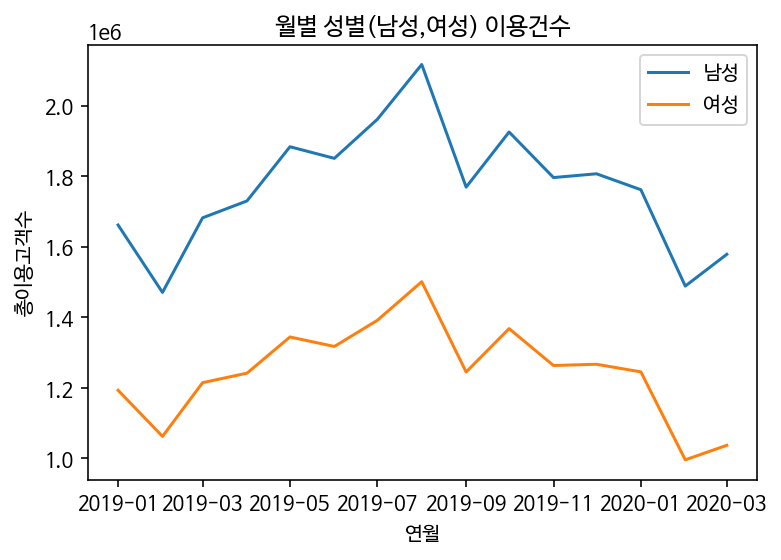

In [79]:
#월별 관련업종별  

df_jejulive = df_jeju[df_jeju['SEX_CTGO_CD']==1]
df_jejulive= df_jeju[df_jeju['SEX_CTGO_CD']==2]

df_jejusc1_graph = df_jejusc1.groupby('REG_YYMM')['CNT'].sum()
df_jejusc2_graph = df_jejusc2.groupby('REG_YYMM')['CNT'].sum()


frame = plt.figure()
gridsc1 = frame.add_subplot()
gridsc1.plot(df_jejusc1_graph)
gridsc1.plot(df_jejusc2_graph)

# plt.rcParams['figure.figsize']=[20,10]
# plt.xticks(fontsize = 20)

gridsc1.set_xlabel('연월')
gridsc1.set_ylabel('총이용고객수')
gridsc1.set_title('월별 성별(남성,여성) 이용건수')
gridsc1.legend(('남성','여성' ))
#          bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
plt.show()

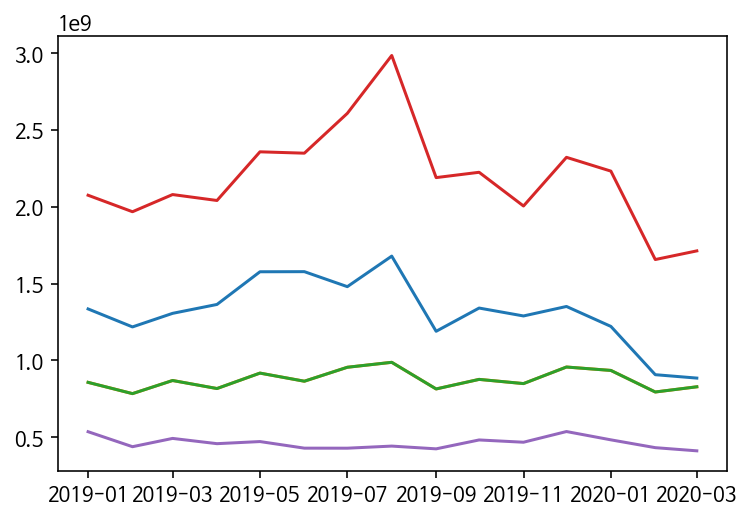

In [80]:
#월별 관련업종별 월매출 변화추이   ----1 요식업

df_jejurest1 = df_jeju[df_jeju['STD_CLSS_NM']=='일식 음식점업']
df_jejurest2= df_jeju[df_jeju['STD_CLSS_NM']=='중식 음식점업']
df_jejurest3= df_jeju[df_jeju['STD_CLSS_NM']=='중식 음식점업']
df_jejurest4= df_jeju[df_jeju['STD_CLSS_NM']=='서양식 음식점업']
df_jejurest5= df_jeju[df_jeju['STD_CLSS_NM']=='기타 외국식 음식점업']



df_jejurest1_graph = df_jejurest1.groupby('REG_YYMM')['AMT'].sum()
df_jejurest2_graph = df_jejurest2.groupby('REG_YYMM')['AMT'].sum()
df_jejurest3_graph = df_jejurest3.groupby('REG_YYMM')['AMT'].sum()
df_jejurest4_graph = df_jejurest4.groupby('REG_YYMM')['AMT'].sum()
df_jejurest5_graph = df_jejurest5.groupby('REG_YYMM')['AMT'].sum()


# plt.rcParams['figure.figsize']=[30,20]
framerest = plt.figure()
gridrest = framerest.add_subplot()
gridrest.plot(df_jejurest1_graph)
gridrest.plot(df_jejurest2_graph)
gridrest.plot(df_jejurest3_graph)
gridrest.plot(df_jejurest4_graph)
gridrest.plot(df_jejurest5_graph)

gridsc1.set_xlabel('연월')
gridsc1.set_ylabel('총매출')
gridsc1.set_title('외국식 음식점업별 월매출 변화추이')
gridsc1.legend(('일식 음식점업','중식 음식점업','서양식 음식점업','기타 외국식 음식점업'))
#          bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

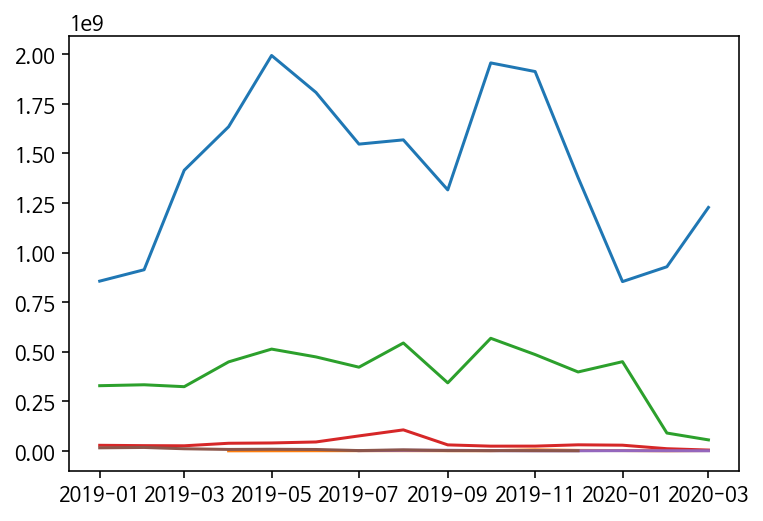

In [81]:
#월별 관련업종별 월매출 변화추이   ----2 스포츠 문화 레저

df_jejusports1 = df_jeju[df_jeju['STD_CLSS_NM']=='골프장 운영업']
df_jejusports2= df_jeju[df_jeju['STD_CLSS_NM']=='기타 수상오락 서비스업']
df_jejusports3= df_jeju[df_jeju['STD_CLSS_NM']=='전시 및 행사 대행업']
df_jejusports4= df_jeju[df_jeju['STD_CLSS_NM']=='여행사업']
df_jejusports5= df_jeju[df_jeju['STD_CLSS_NM']=='그외 기타 분류안된 오락관련 서비스업']
df_jejusports6= df_jeju[df_jeju['STD_CLSS_NM']=='그외 기타 스포츠시설 운영업']




df_jejusports1_graph = df_jejusports1.groupby('REG_YYMM')['AMT'].sum()
df_jejusports2_graph = df_jejusports2.groupby('REG_YYMM')['AMT'].sum()
df_jejusports3_graph = df_jejusports3.groupby('REG_YYMM')['AMT'].sum()
df_jejusports4_graph = df_jejusports4.groupby('REG_YYMM')['AMT'].sum()
df_jejusports5_graph = df_jejusports5.groupby('REG_YYMM')['AMT'].sum()
df_jejusports6_graph = df_jejusports6.groupby('REG_YYMM')['AMT'].sum()



# plt.rcParams['figure.figsize']=[30,20]
framesports = plt.figure()
gridsports = framesports.add_subplot()
gridsports.plot(df_jejusports1_graph)
gridsports.plot(df_jejusports2_graph)
gridsports.plot(df_jejusports3_graph)
gridsports.plot(df_jejusports4_graph)
gridsports.plot(df_jejusports5_graph)
gridsports.plot(df_jejusports6_graph)


gridsc1.set_xlabel('연월')
gridsc1.set_ylabel('총매출')
gridsc1.set_title('스포츠/문화/레저업종 월매출 변화추이')
gridsc1.legend(('골프장 운영업','기타 수상오락 서비스업','전시 및 행사 대행업',' 여행사업','그외 기타 분류안된 오락관련 서비스업','그외 기타 스포츠시설 운영업'))

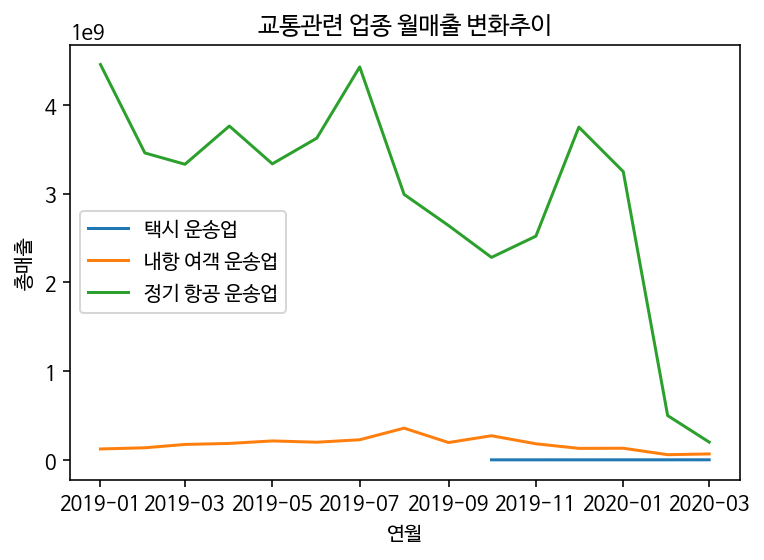

In [83]:
#월별 관련업종별 월매출 변화추이   ----3 교통
df_jejutransportation1 = df_jeju[df_jeju['STD_CLSS_NM']=='택시 운송업']
df_jejutransportation2= df_jeju[df_jeju['STD_CLSS_NM']=='내항 여객 운송업']
df_jejutransportation3= df_jeju[df_jeju['STD_CLSS_NM']=='정기 항공 운송업']

df_jejutransportation1_graph = df_jejutransportation1.groupby('REG_YYMM')['AMT'].sum()
df_jejutransportation2_graph = df_jejutransportation2.groupby('REG_YYMM')['AMT'].sum()
df_jejutransportation3_graph = df_jejutransportation3.groupby('REG_YYMM')['AMT'].sum()


frametransportation = plt.figure()
gridtransportation = frametransportation.add_subplot()
gridtransportation.plot(df_jejutransportation1_graph)
gridtransportation.plot(df_jejutransportation2_graph)
gridtransportation.plot(df_jejutransportation3_graph)

gridtransportation.set_xlabel('연월')
gridtransportation.set_ylabel('총매출')
gridtransportation.set_title('교통관련 업종 월매출 변화추이')
gridtransportation.legend(('택시 운송업', '내항 여객 운송업', '정기 항공 운송업'))

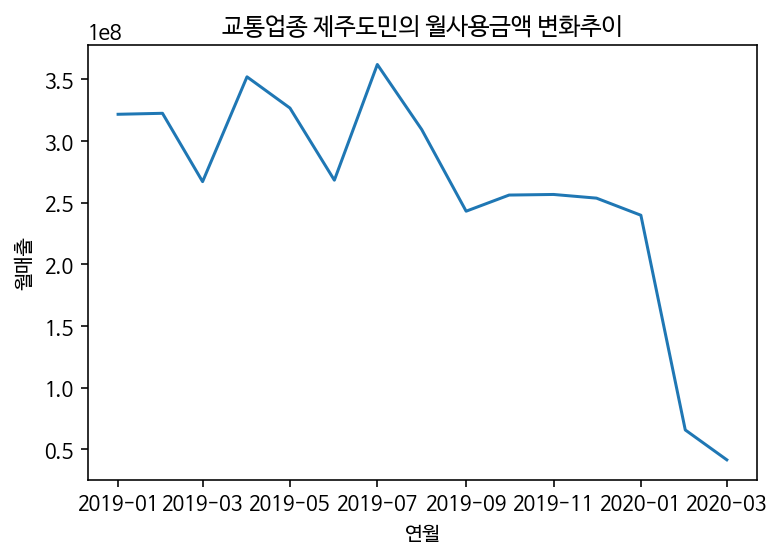

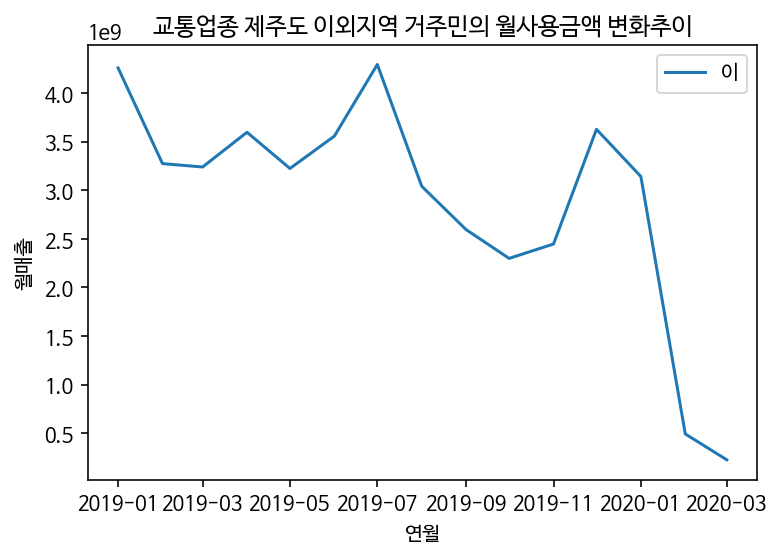

In [84]:
#교통업종 제주도거주여부에 따른 월매출 변화추이   ----3 교통
#교통업종에 따른 데이터프레임 출력
df_jejutransportation1 = df_jeju[df_jeju['STD_CLSS_NM']=='택시 운송업']
df_jejutransportation2= df_jeju[df_jeju['STD_CLSS_NM']=='내항 여객 운송업']
df_jejutransportation3= df_jeju[df_jeju['STD_CLSS_NM']=='정기 항공 운송업']
#거주지역에 따라 또다시 분류하여 데이터프레임 출력
df_jejutransportation1_jeju = df_jejutransportation1[df_jejutransportation1['HOM_SIDO_NM']=='제주']
df_jejutransportation1_nojeju = df_jejutransportation1[df_jejutransportation1['HOM_SIDO_NM']!='제주']





df_jejutransportation2_jeju= df_jejutransportation2[df_jejutransportation2['HOM_SIDO_NM']=='제주']
df_jejutransportation2_nojeju= df_jejutransportation2[df_jejutransportation2['HOM_SIDO_NM']!='제주']
df_jejutransportation3_jeju= df_jejutransportation3[df_jejutransportation3['HOM_SIDO_NM']=='제주']
df_jejutransportation3_nojeju= df_jejutransportation3[df_jejutransportation3['HOM_SIDO_NM']!='제주']
#제주도민이 사용한 교통업종끼리 묶기
df_jejutransportation_jeju = pd.concat([df_jejutransportation1_jeju,df_jejutransportation2_jeju,df_jejutransportation3_jeju])
#제주도민이 아닌 사람이 사용한 교통업종끼리 묶기
df_jejutransportation_nojeju = pd.concat(
    [df_jejutransportation1_nojeju,df_jejutransportation2_nojeju,df_jejutransportation3_nojeju])


df_jejutransportation_jeju_per=df_jejutransportation_jeju['AMT']/df_jejutransportation_jeju['CNT']
df_jejutransportation_nojeju_per=df_jejutransportation_nojeju['AMT']/df_jejutransportation_nojeju['CNT']

df_jejutransportation_jeju_graph = df_jejutransportation_jeju.groupby('REG_YYMM')['AMT'].sum()
df_jejutransportation_nojeju_graph = df_jejutransportation_nojeju.groupby('REG_YYMM')['AMT'].sum()




framejejutransportation = plt.figure()
gridjejutransportation = framejejutransportation.add_subplot()
gridjejutransportation.plot(df_jejutransportation_jeju_graph)

framejejutransportation2 = plt.figure()
gridjejutransportation2 = framejejutransportation2.add_subplot()
gridjejutransportation2.plot(df_jejutransportation_nojeju_graph)



# plt.rcParams['figure.figsize']=[20,10]
# plt.xticks(fontsize = 20)
gridjejutransportation.set_xlabel('연월')
gridjejutransportation.set_ylabel('월매출')
gridjejutransportation.set_title('교통업종 제주도민의 월사용금액 변화추이')
gridtransportation.legend('제주도민')

gridjejutransportation2.set_xlabel('연월')
gridjejutransportation2.set_ylabel('월매출')
gridjejutransportation2.set_title('교통업종 제주도 이외지역 거주민의 월사용금액 변화추이')
gridjejutransportation2.legend('이외지역거주민')

In [85]:
df_jejutransportation1_jeju
df_jejutransportation1_jeju_hun=df_jejutransportation1_jeju.AMT.rank(pct=True)

df_jejutransportation2_jeju
df_jejutransportation2_jeju_hun=df_jejutransportation2_jeju.AMT.rank(pct=True)

df_jejutransportation3_jeju
df_jejutransportation3_jeju_hun=df_jejutransportation3_jeju.AMT.rank(pct=True)


In [86]:
df_jejutransportation1_jeju.head()

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
350996,16944183,2019-10-01,제주,제주시,택시 운송업,제주,제주시,20s,2,1,6,24900,6
350997,16944184,2019-10-01,제주,제주시,택시 운송업,제주,제주시,70s,2,5,5,53100,9
386329,18610529,2019-11-01,제주,제주시,택시 운송업,제주,제주시,20s,1,1,3,16300,3
386330,18610530,2019-11-01,제주,제주시,택시 운송업,제주,제주시,30s,2,2,4,22700,4
386331,18610531,2019-11-01,제주,제주시,택시 운송업,제주,제주시,50s,2,4,4,28600,4


In [87]:
df_jejutransportation2_jeju.head()

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
2020,1456875,2019-01-01,제주,서귀포시,내항 여객 운송업,제주,서귀포시,50s,1,4,4,279700,4
2021,1456876,2019-01-01,제주,서귀포시,내항 여객 운송업,제주,제주시,30s,1,2,6,629300,6
2022,1456877,2019-01-01,제주,서귀포시,내항 여객 운송업,제주,제주시,30s,2,2,3,491600,6
2023,1456878,2019-01-01,제주,서귀포시,내항 여객 운송업,제주,제주시,40s,1,3,5,645200,6
2024,1456879,2019-01-01,제주,서귀포시,내항 여객 운송업,제주,제주시,40s,2,3,5,783500,6


In [88]:
df_jejutransportation3_jeju.head()

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
27030,1481885,2019-01-01,제주,제주시,정기 항공 운송업,제주,서귀포시,20s,1,1,63,4916500,65
27031,1481886,2019-01-01,제주,제주시,정기 항공 운송업,제주,서귀포시,20s,1,2,5,498800,4
27032,1481887,2019-01-01,제주,제주시,정기 항공 운송업,제주,서귀포시,20s,2,1,55,2977700,61
27033,1481888,2019-01-01,제주,제주시,정기 항공 운송업,제주,서귀포시,20s,2,2,17,751700,13
27034,1481889,2019-01-01,제주,제주시,정기 항공 운송업,제주,서귀포시,30s,1,1,5,287000,4


In [89]:
df_jejutransportation_jeju
df_jejutransportation_jeju['AMThun'] = df_jejutransportation_jeju.AMT / df_jejutransportation_jeju.AMT.sum()
# df_jejutransportation_jeju_hun=df_jejutransportation_jeju.AMT.rank(pct=True)
# df_jejutransportation_jeju['AMThun']= df_jejutransportation_jeju_hun

In [90]:
df_jejutransportation_jeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,AMThun
350996,16944183,2019-10-01,제주,제주시,택시 운송업,제주,제주시,20s,2,1,6,24900,6,0.000006
350997,16944184,2019-10-01,제주,제주시,택시 운송업,제주,제주시,70s,2,5,5,53100,9,0.000014
386329,18610529,2019-11-01,제주,제주시,택시 운송업,제주,제주시,20s,1,1,3,16300,3,0.000004
386330,18610530,2019-11-01,제주,제주시,택시 운송업,제주,제주시,30s,2,2,4,22700,4,0.000006
386331,18610531,2019-11-01,제주,제주시,택시 운송업,제주,제주시,50s,2,4,4,28600,4,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493310,24593233,2020-03-01,제주,제주시,정기 항공 운송업,제주,제주시,50s,2,4,113,2938200,48,0.000756
493311,24593234,2020-03-01,제주,제주시,정기 항공 운송업,제주,제주시,60s,1,5,61,1662700,34,0.000428
493312,24593235,2020-03-01,제주,제주시,정기 항공 운송업,제주,제주시,60s,2,5,31,220800,1,0.000057
493313,24593236,2020-03-01,제주,제주시,정기 항공 운송업,제주,제주시,70s,1,5,15,470600,11,0.000121


In [91]:
df_jejutransportation_nojeju
df_jejutransportation_nojeju['AMThun'] = df_jejutransportation_nojeju.AMT / df_jejutransportation_nojeju.AMT.sum()

In [92]:
df_jejutransportation_nojeju

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,AMThun
2017,1456872,2019-01-01,제주,서귀포시,내항 여객 운송업,대구,북구,50s,2,4,3,341300,3,0.000008
2018,1456873,2019-01-01,제주,서귀포시,내항 여객 운송업,인천,부평구,50s,2,4,3,233500,3,0.000005
2019,1456874,2019-01-01,제주,서귀포시,내항 여객 운송업,인천,서구,60s,1,5,3,281000,3,0.000006
15131,1469986,2019-01-01,제주,제주시,내항 여객 운송업,강원,강릉시,50s,1,4,5,210500,5,0.000005
15132,1469987,2019-01-01,제주,제주시,내항 여객 운송업,강원,원주시,20s,2,1,5,110500,6,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493318,24593241,2020-03-01,제주,제주시,정기 항공 운송업,충남,아산시,40s,2,3,4,818500,4,0.000019
493319,24593242,2020-03-01,제주,제주시,정기 항공 운송업,충남,천안시 동남구,20s,2,1,7,103600,4,0.000002
493320,24593243,2020-03-01,제주,제주시,정기 항공 운송업,충남,천안시 서북구,20s,1,1,9,139500,2,0.000003
493321,24593244,2020-03-01,제주,제주시,정기 항공 운송업,충남,천안시 서북구,40s,1,3,6,87300,3,0.000002


350996      4150.000000
350997      5900.000000
386329      5433.333333
386330      5675.000000
386331      7150.000000
              ...      
493310     61212.500000
493311     48902.941176
493312    220800.000000
493313     42781.818182
493314     56966.666667
Length: 1219, dtype: float64


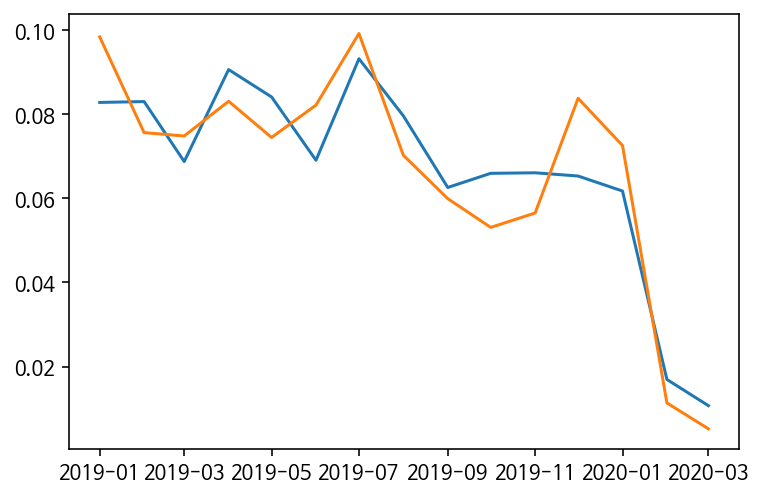

In [93]:
df_jejutransportation_jeju_hun_graph = df_jejutransportation_jeju.groupby('REG_YYMM')['AMThun'].sum()
df_jejutransportation_nojeju_hun_graph = df_jejutransportation_nojeju.groupby('REG_YYMM')['AMThun'].sum()




framejejutransportation_hun = plt.figure()
gridjejutransportation_hun = framejejutransportation_hun.add_subplot()
gridjejutransportation_hun.plot(df_jejutransportation_jeju_hun_graph)
gridjejutransportation_hun.plot(df_jejutransportation_nojeju_hun_graph)

gridjejutransportation.set_xlabel('연월')
gridjejutransportation.set_ylabel('월매출')
gridjejutransportation.set_title('교통업종 제주도민의 월사용금액 변화추이')
gridtransportation.legend('제주도민','비제주도민')

print(df_jejutransportation_jeju_per)

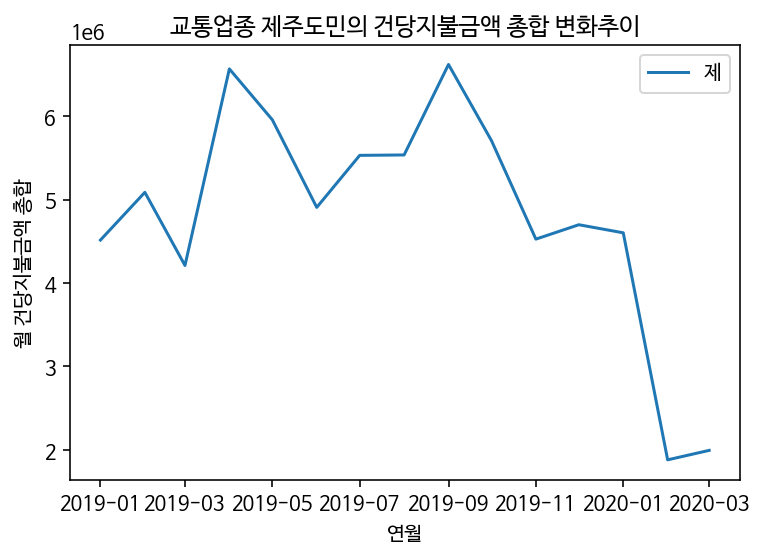

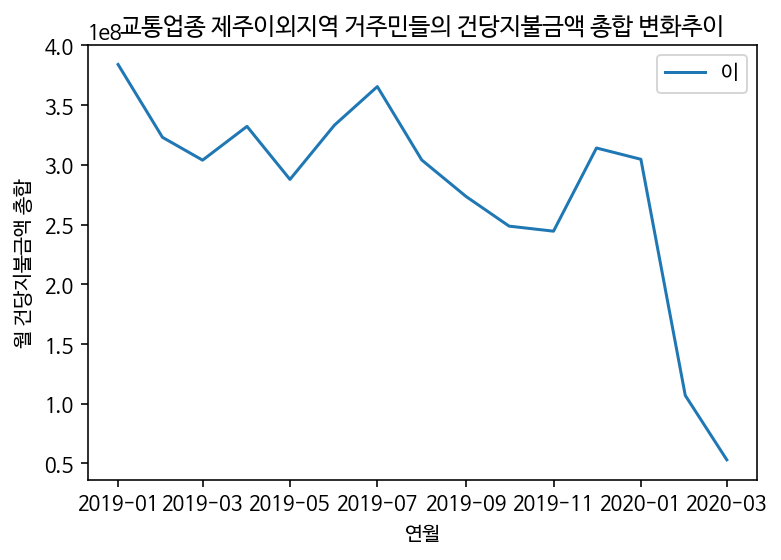

In [94]:
df_jejutransportation_jeju_per=df_jejutransportation_jeju['AMT']/df_jejutransportation_jeju['CNT']
df_jejutransportation_nojeju_per=df_jejutransportation_nojeju['AMT']/df_jejutransportation_nojeju['CNT']
#건당 지불금액 시리즈를 데이터프레임에 추가
df_jejutransportation_jeju['AMTper']= df_jejutransportation_jeju_per
df_jejutransportation_nojeju['AMTper']= df_jejutransportation_nojeju_per


df_jejutransportation_jeju_AMTper_graph = df_jejutransportation_jeju.groupby('REG_YYMM')['AMTper'].sum()
df_jejutransportation_nojeju_AMTper_graph = df_jejutransportation_nojeju.groupby('REG_YYMM')['AMTper'].sum()




framejejutransportation_AMTper = plt.figure()
gridjejutransportation_AMTper = framejejutransportation_AMTper.add_subplot()
gridjejutransportation_AMTper.plot(df_jejutransportation_jeju_AMTper_graph)

framejejutransportation_AMTper2 = plt.figure()

gridjejutransportation_AMTper2 = framejejutransportation_AMTper2.add_subplot()
gridjejutransportation_AMTper2.plot(df_jejutransportation_nojeju_AMTper_graph)

# plt.rcParams['figure.figsize']=[20,10]
# plt.xticks(fontsize = 20)
gridjejutransportation_AMTper.set_xlabel('연월')
gridjejutransportation_AMTper.set_ylabel('월 건당지불금액 총합')
gridjejutransportation_AMTper.set_title('교통업종 제주도민의 건당지불금액 총합 변화추이')
gridjejutransportation_AMTper.legend('제주도민')

gridjejutransportation_AMTper2.set_xlabel('연월')
gridjejutransportation_AMTper2.set_ylabel('월 건당지불금액 총합')
gridjejutransportation_AMTper2.set_title('교통업종 제주이외지역 거주민들의 건당지불금액 총합 변화추이')
gridjejutransportation_AMTper2.legend('이외지역거주민')